In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import pandas_profiling
import folium
import webbrowser
from PIL import Image
#pandas_profiling.ProfileReport(USA_Housing)

## Import Directory

In [3]:
link="D:/As Freelancer/Live Assignment/Spere Consultancy/SCJULY001/crimes-in-chicago/"
dirlist=os.listdir(link)
print(dirlist)

['Chicago2001-2004-1.csv', 'Chicago2001-2004.csv', 'Chicago2005-2007.csv', 'Chicago2008-2011.csv', 'Chicago2012-2017.csv', 'Crimes_-_2001_to_present.csv', 'Profiling.docx']


## Import Data

In [64]:
c0104=pd.read_csv(link+dirlist[1])
c0507=pd.read_csv(link+dirlist[2])
c0811=pd.read_csv(link+dirlist[3])
c1217=pd.read_csv(link+dirlist[4])
c1719=pd.read_csv(link+dirlist[5])

In [65]:
c1719.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

## Creating Data Profile

In [5]:
#pandas_profiling.ProfileReport(c0104)

In [6]:
#pandas_profiling.ProfileReport(c0507)

In [7]:
#pandas_profiling.ProfileReport(c0811)

In [8]:
#pandas_profiling.ProfileReport(c1217)

## Data Cleaning

In [9]:
c0104.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01-01-2004 00:01,082XX S COLES AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,6,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03-01-2003 00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,6,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05-01-2003 01:00,111XX S NORMAL AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,6,1174948.0,1831051.0,2003,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [224]:

c0104smooth=c0104.dropna(axis=1)
c0104smooth.isna().sum()
c0104smooth=c0104smooth[1:]
print(len(c0104smooth))
c0104.describe().to_csv(link+"des.csv")

1048574


In [225]:
c0507smooth=c0507.dropna(axis=1)
c0507smooth.isna().sum()
c0507smooth=c0507smooth[1:]
print(len(c0507smooth))
c0507.describe().to_csv(link+"des1.csv")

1048574


In [226]:
c0811smooth=c0811.dropna(axis=1)
c0811smooth.isna().sum()
c0811smooth=c0811smooth[1:]
print(len(c0811smooth))
c0811.describe().to_csv(link+"des2.csv")

1048574


In [227]:
c1217smooth=c1217.dropna(axis=1)
c1217smooth.isna().sum()
c1217smooth=c1217smooth[1:]
print(len(c1217smooth))
c1217.describe().to_csv(link+"des3.csv")

1048574


In [62]:
c1719shooth=c1719


## Subsetting

In [14]:
c1=c0104smooth.columns.tolist()
c0104smooth=c0104smooth[c1[1:]]
c0104smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On
1,4676906,HM278933,03-01-2003 00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,935,9,26,2003,04/15/2016 08:55:02 AM
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,False,1413,14,20,2004,08/17/2015 03:03:40 PM
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,False,False,2521,25,6,2004,08/17/2015 03:03:40 PM
4,4677901,HM275615,05-01-2003 01:00,111XX S NORMAL AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,2233,22,6,2003,04/15/2016 08:55:02 AM
5,4838048,HM440266,08-01-2004 00:01,012XX S HARDING AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,False,False,1011,10,6,2004,08/17/2015 03:03:40 PM


In [15]:
c2=c0507smooth.columns.tolist()
c0507smooth=c0507smooth[c2[1:]]
c0507smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,True,False,321,18,2006,04/15/2016 08:55:02 AM
2,4673628,HM113861,01-08-2006 23:16,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,False,False,321,04A,2006,04/15/2016 08:55:02 AM
3,4673629,HM274049,04-05-2006 18:45,061XX W NEWPORT AVE,460,BATTERY,SIMPLE,False,False,1633,08B,2006,04/15/2016 08:55:02 AM
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,True,False,822,18,2006,04/15/2016 08:55:02 AM
5,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,560,ASSAULT,SIMPLE,True,False,734,08A,2006,04/15/2016 08:55:02 AM


In [16]:
c3=c0811smooth.columns.tolist()
c0811smooth=c0811smooth[c3[1:]]
c0811smooth.head()

,ID,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,4786,10-09-2008 03:30,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,True,False,1533,01A,2008,08/17/2015 03:03:40 PM
2,4787,10-09-2008 08:35,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,False,False,831,01A,2008,08/17/2015 03:03:40 PM
3,4788,10-10-2008 02:33,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,False,1524,01A,2008,08/17/2015 03:03:40 PM
4,4789,10-10-2008 12:50,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,False,True,1032,01A,2008,08/17/2015 03:03:40 PM
5,4790,10-10-2008 20:32,015XX W 14TH ST,110,HOMICIDE,FIRST DEGREE MURDER,True,True,1231,01A,2008,08/17/2015 03:03:40 PM


In [17]:
c4=c1217smooth.columns.tolist()
c1217smooth=c1217smooth[c4[1:]]
c1217smooth.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On
1,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,313,08B,2016,05-10-2016 15:56
2,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,False,False,1524,24,2016,05-10-2016 15:56
3,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,False,False,1532,08B,2016,05-10-2016 15:56
4,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,False,True,1523,6,2016,05-10-2016 15:56
5,10508702,HZ250447,05-03-2016 22:35,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,False,False,631,04B,2016,05-10-2016 15:56


In [50]:
c5=c1719smooth.columns.tolist()
c1719smooth=c1719smooth
c1719smooth.head()
c1719smooth.columns

Index(['IUCR', 'Primary Type', 'Description', 'Arrest', 'Domestic', 'Beat',
       'FBI Code'],
      dtype='object')

## Primary Analysis

In [18]:
c0104arr=np.array(c0104smooth['Primary Type'])
c0104u=np.unique(c0104arr)

In [19]:
c0104key=np.unique(np.array(np.array(c0104smooth['Primary Type'])))
c0104val=np.array(c0104smooth['Primary Type'].value_counts().values)
print(c0104u[:8])
print(c0104val[:8])

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[212361 201429 120182 111094  68164  67525  56454  55793]


<BarContainer object of 8 artists>

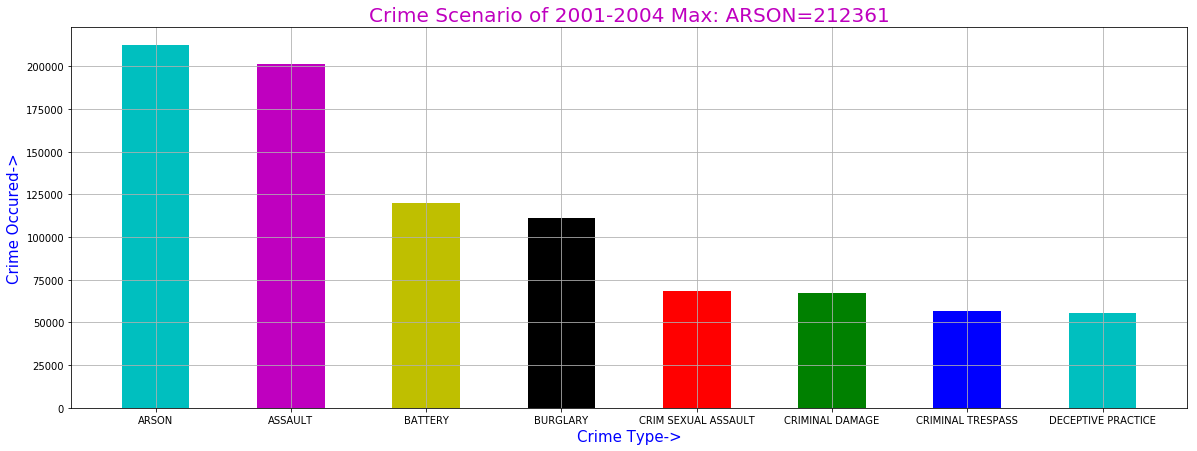

In [20]:
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001-2004 Max: {}={}".format(c0104u[:8][0],c0104val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0104u[:8],c0104val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[197319 190674 142127 129549  63624  61549  56481  47448]


<BarContainer object of 8 artists>

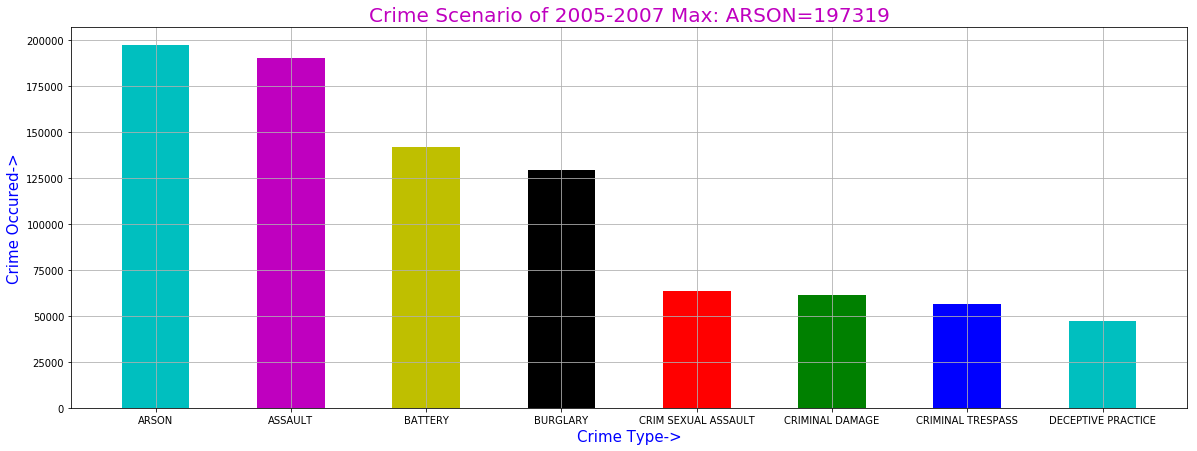

In [21]:
c0507arr=np.array(c0507smooth['Primary Type'])
c0507u=np.unique(c0507arr)
c0507key=np.unique(np.array(np.array(c0507smooth['Primary Type'])))
c0507val=np.array(c0507smooth['Primary Type'].value_counts().values)
print(c0507u[:8])
print(c0507val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2005-2007 Max: {}={}".format(c0507u[:8][0],c0507val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0507u[:8],c0507val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[215423 186928 126189 118093  68323  66172  62223  45189]


<BarContainer object of 8 artists>

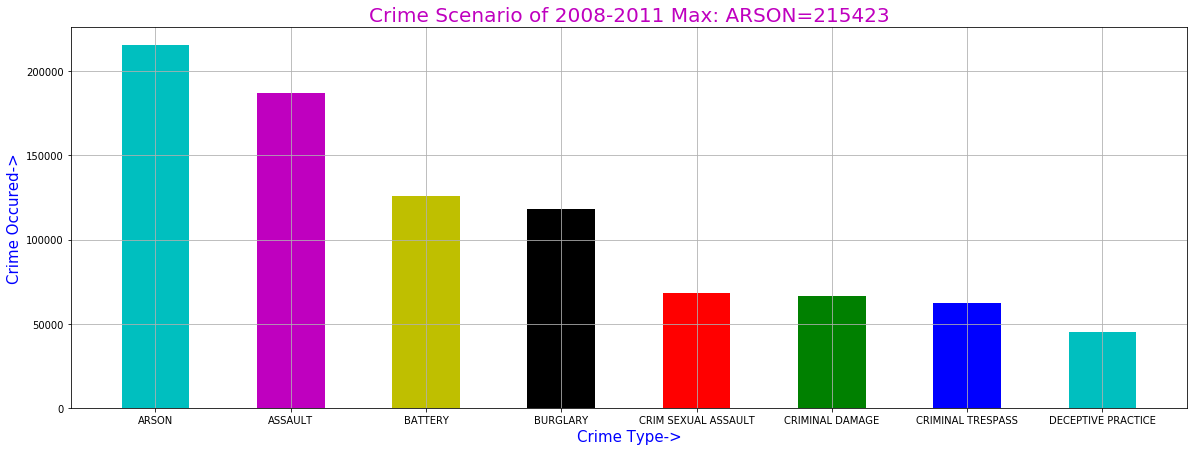

In [22]:
c0811arr=np.array(c0811smooth['Primary Type'])
c0811u=np.unique(c0811arr)
c0811key=np.unique(np.array(np.array(c0811smooth['Primary Type'])))
c0811val=np.array(c0811smooth['Primary Type'].value_counts().values)
print(c0811u[:8])
print(c0811val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2008-2011 Max: {}={}".format(c0811u[:8][0],c0811val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c0811u[:8],c0811val[:8],color=color,width=0.5)

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[236724 188825 110781 109031  64049  61711  61458  48697]


<BarContainer object of 8 artists>

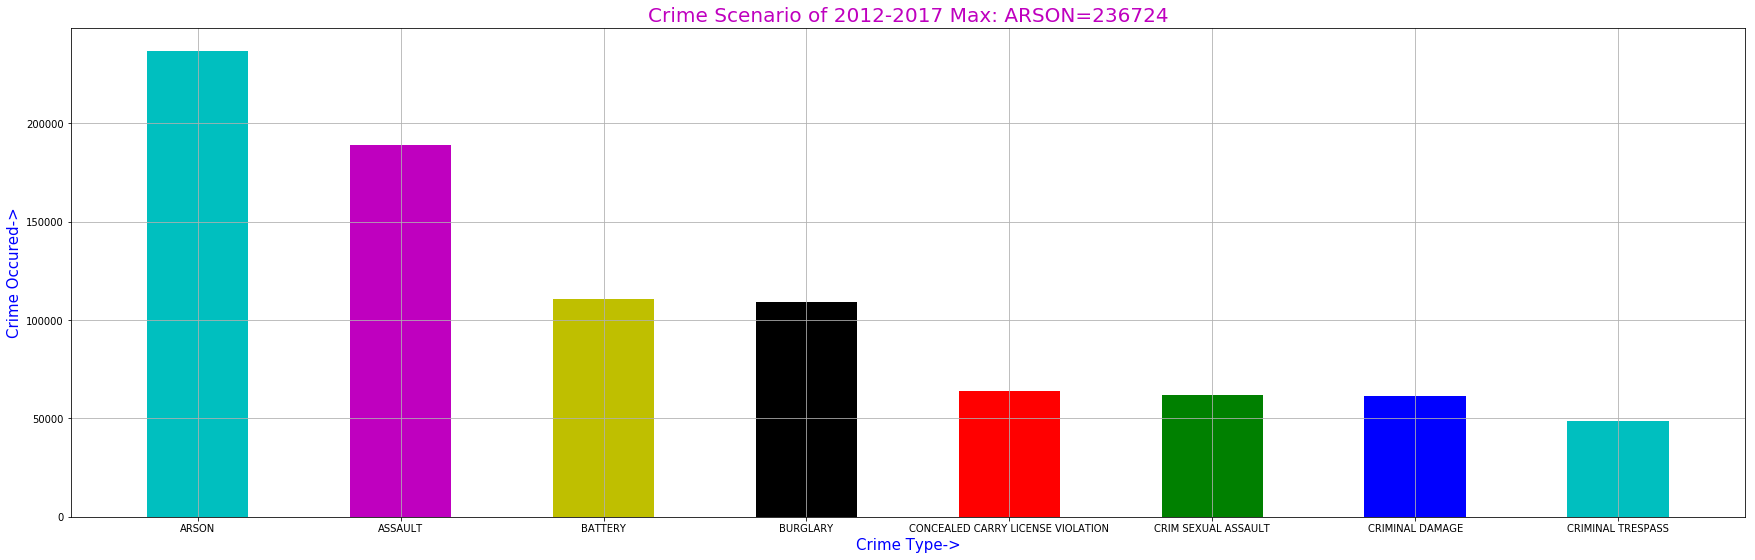

In [23]:
c1217arr=np.array(c1217smooth['Primary Type'])
c1217u=np.unique(c1217arr)
c1217key=np.unique(np.array(np.array(c1217smooth['Primary Type'])))
c1217val=np.array(c1217smooth['Primary Type'].value_counts().values)
print(c1217u[:8])
print(c1217val[:8])
color='cmykrgb'
plt.figure(figsize=(30,9))
plt.title("Crime Scenario of 2012-2017 Max: {}={}".format(c1217u[:8][0],c1217val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c1217u[:8],c1217val[:8],color=color,width=0.5)

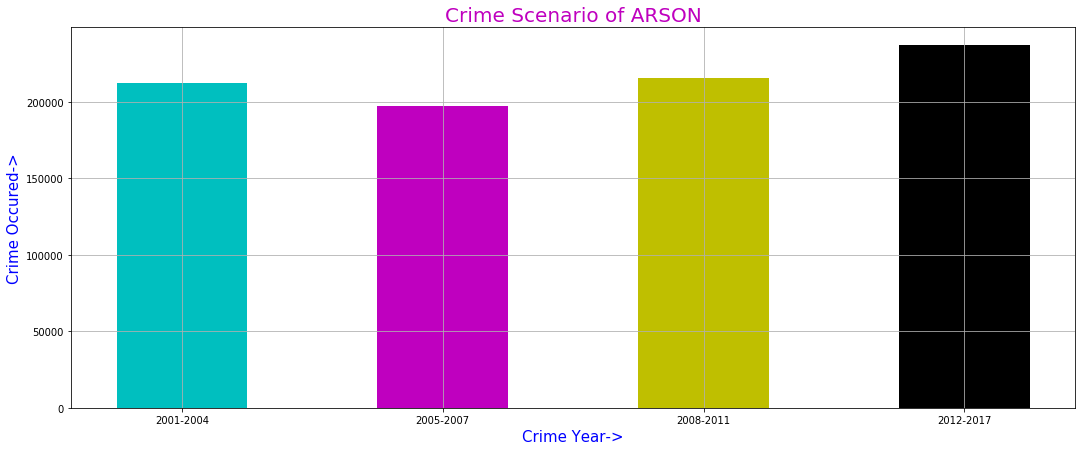

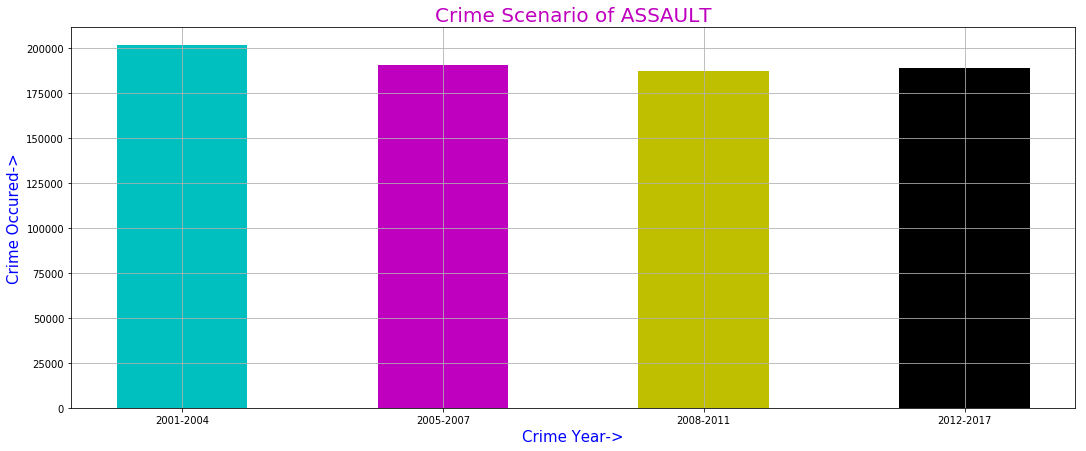

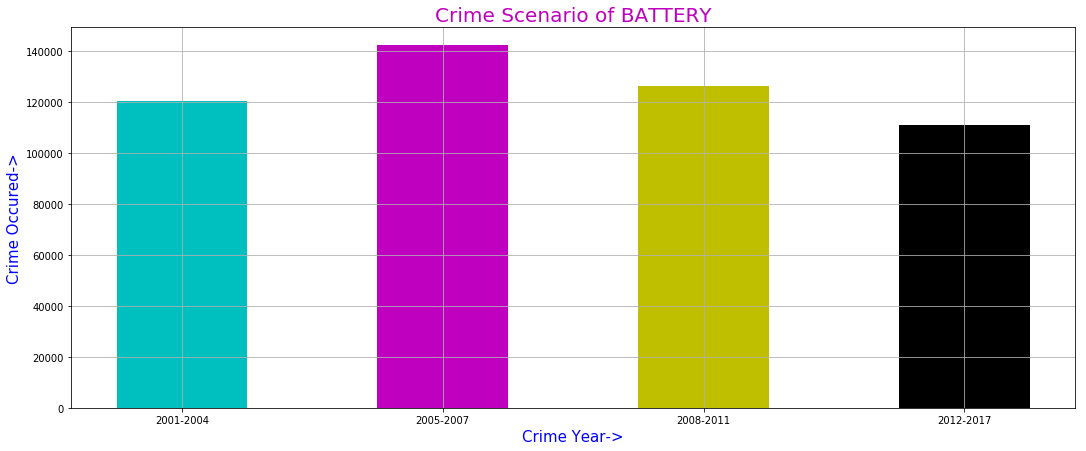

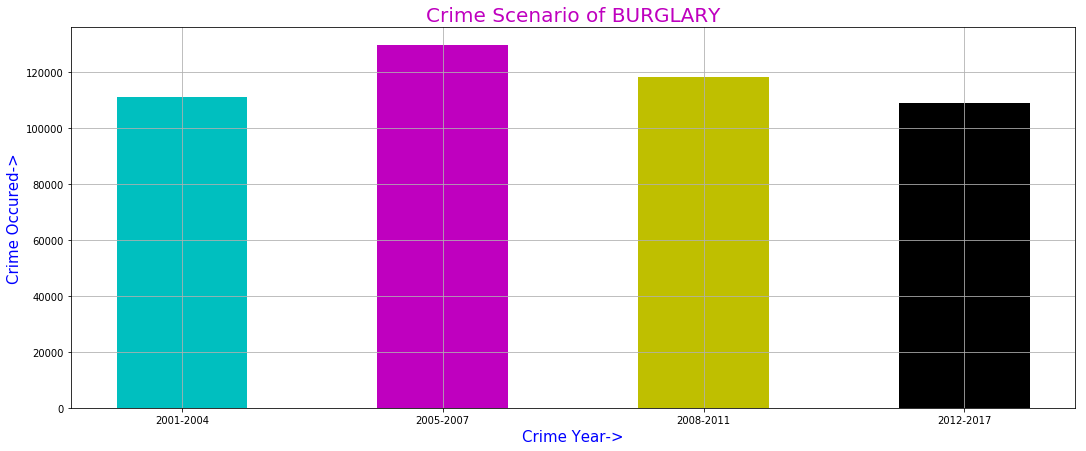

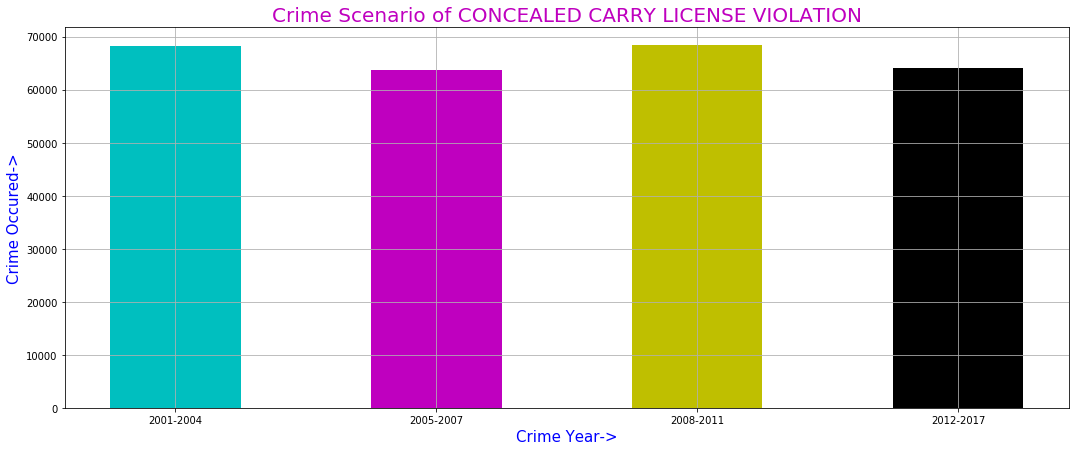

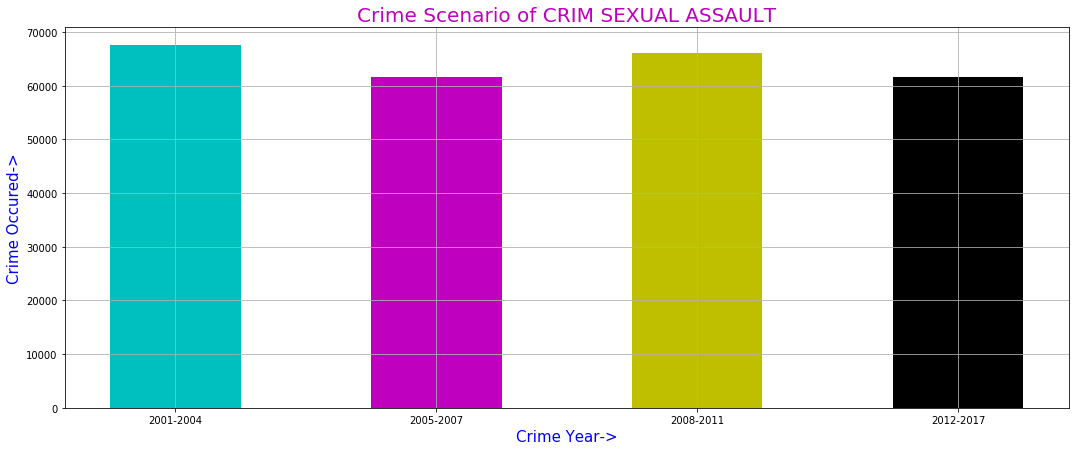

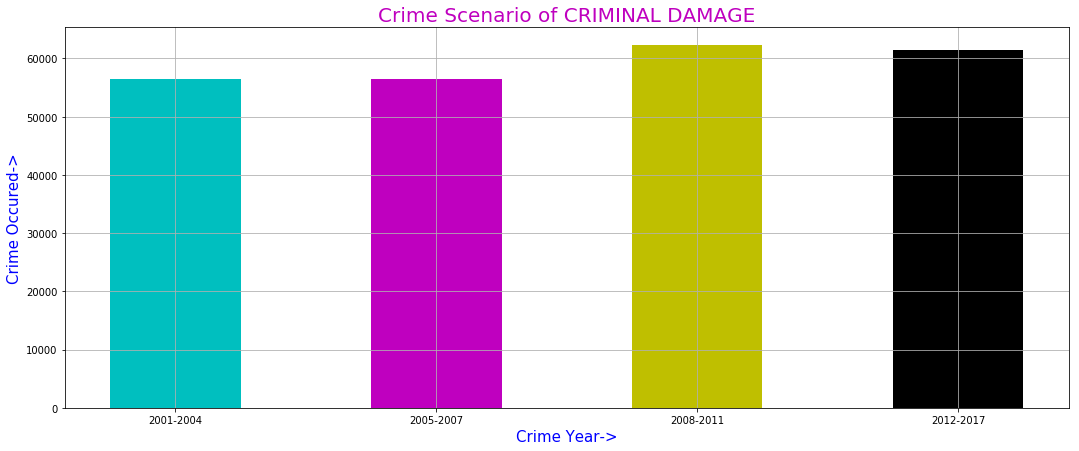

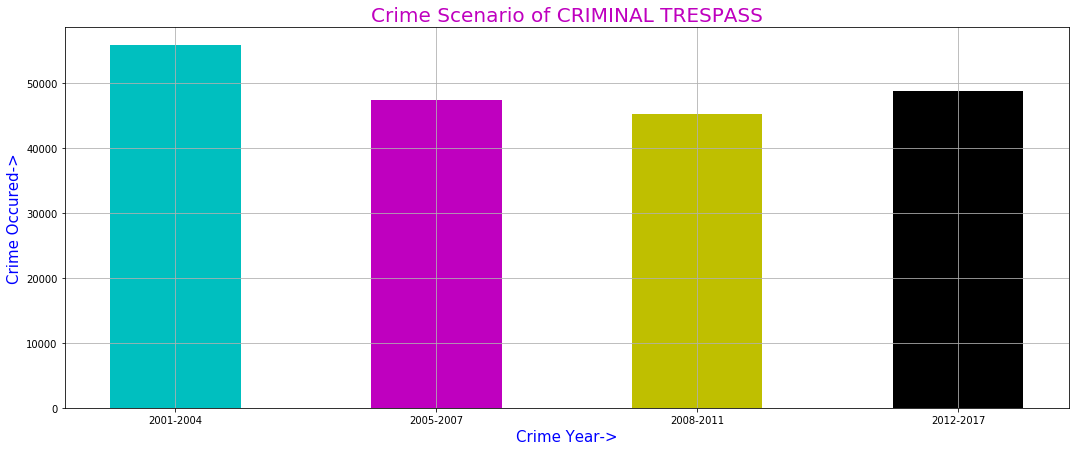

In [24]:
for i in range(len(c0104val[:8])):
    val=[c0104val[:8][i],c0507val[:8][i],c0811val[:8][i],c1217val[:8][i]]
    year=['2001-2004','2005-2007','2008-2011','2012-2017']
    color='cmykrgb'
    plt.figure(figsize=(18,7))
    plt.title("Crime Scenario of {}".format(c1217u[:8][i]),fontsize=20,color='m')
    plt.xlabel("Crime Year->",fontsize=15,color='b')
    plt.ylabel("Crime Occured->",fontsize=15,color='b')
    plt.grid()
    plt.bar(year,val,color=color,width=0.5)

### 2001

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[98761 93443 55843 50564 31382 29627 27545 26008]


<BarContainer object of 8 artists>

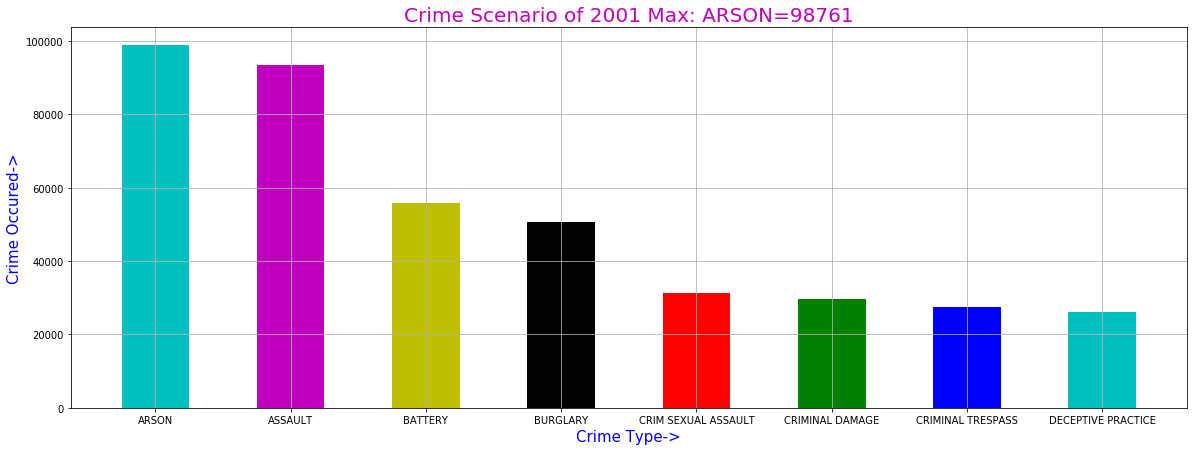

In [25]:
c01=c0104smooth[c0104smooth['Year']==2001]
c01=c01[c01.columns.tolist()[1:]]
c01.head()
c01arr=np.array(c01['Primary Type'])
c01u=np.unique(c01arr)
c01key=np.unique(np.array(np.array(c01['Primary Type'])))
c01val=np.array(c01['Primary Type'].value_counts().values)
print(c01u[:8])
print(c01val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c01u[:8][0],c01val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c01u[:8],c01val[:8],color=color,width=0.5)

### 2002

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[97135 94081 55890 51568 32403 31494 25604 25084]


<BarContainer object of 8 artists>

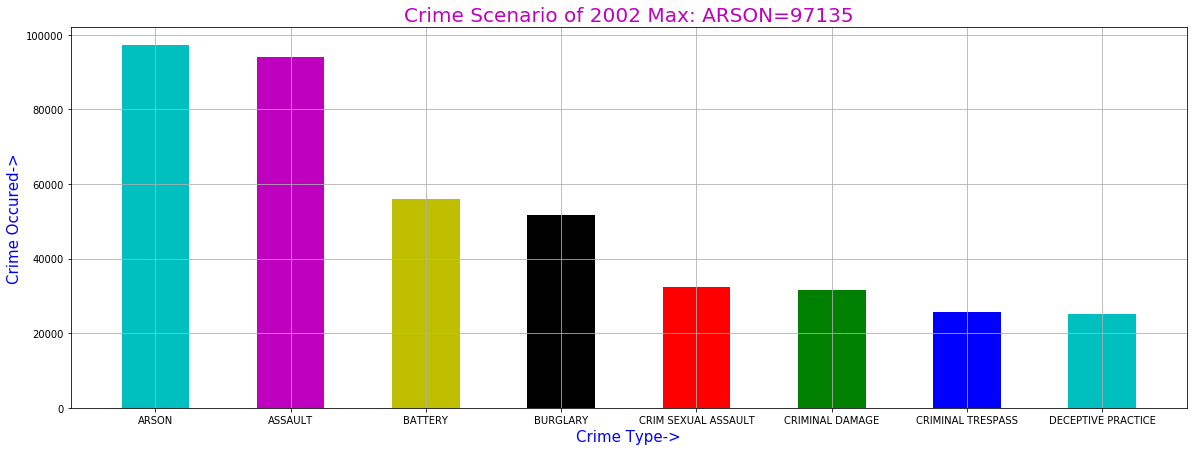

In [26]:
c02=c0104smooth[c0104smooth['Year']==2002]
c02=c02[c02.columns.tolist()[1:]]
c02.head()
c02arr=np.array(c01['Primary Type'])
c02u=np.unique(c02arr)
c02key=np.unique(np.array(np.array(c02['Primary Type'])))
c02val=np.array(c02['Primary Type'].value_counts().values)
print(c02u[:8])
print(c02val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2002 Max: {}={}".format(c02u[:8][0],c02val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c02u[:8],c02val[:8],color=color,width=0.5)

### 2003

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[15842 13883  8890  8438  6111  4639  4172  3802]


<BarContainer object of 8 artists>

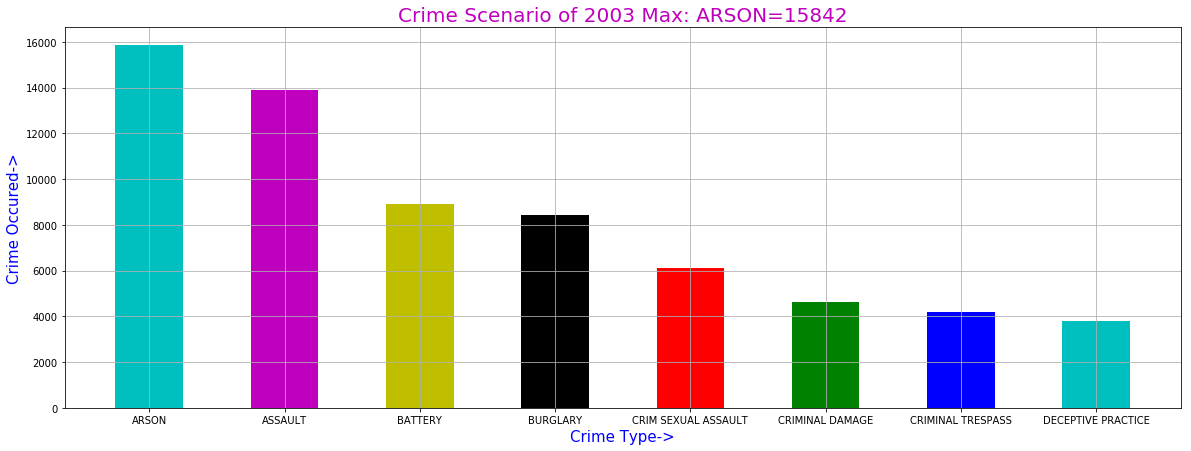

In [27]:
c03=c0104smooth[c0104smooth['Year']==2003]
c03=c03[c03.columns.tolist()[1:]]
c03.head()
c03arr=np.array(c03['Primary Type'])
c03u=np.unique(c03arr)
c03key=np.unique(np.array(np.array(c03['Primary Type'])))
c03val=np.array(c03['Primary Type'].value_counts().values)
print(c03u[:8])
print(c03val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2003 Max: {}={}".format(c03u[:8][0],c03val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c03u[:8],c03val[:8],color=color,width=0.5)

### 2004

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[623 145 145 112  88  72  71  23]


<BarContainer object of 8 artists>

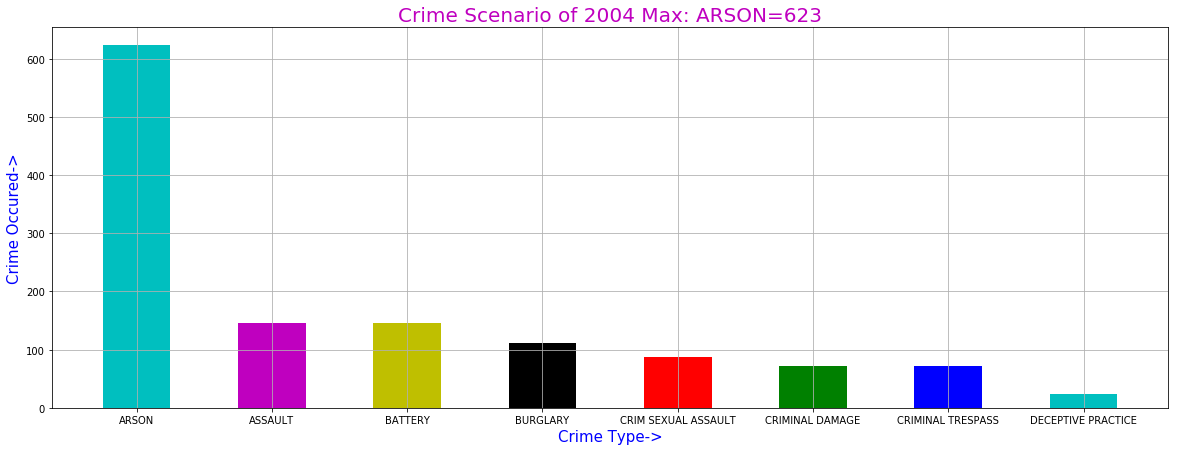

In [28]:
c04=c0104smooth[c0104smooth['Year']==2004]
c04=c04[c04.columns.tolist()[1:]]
c04.head()
c04arr=np.array(c04['Primary Type'])
c04u=np.unique(c04arr)
c04key=np.unique(np.array(np.array(c04['Primary Type'])))
c04val=np.array(c04['Primary Type'].value_counts().values)
print(c04u[:8])
print(c04val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2004 Max: {}={}".format(c04u[:8][0],c04val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c04u[:8],c04val[:8],color=color,width=0.5)

### 2005

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[1425  510  505  280  272  226  165  154]


<BarContainer object of 8 artists>

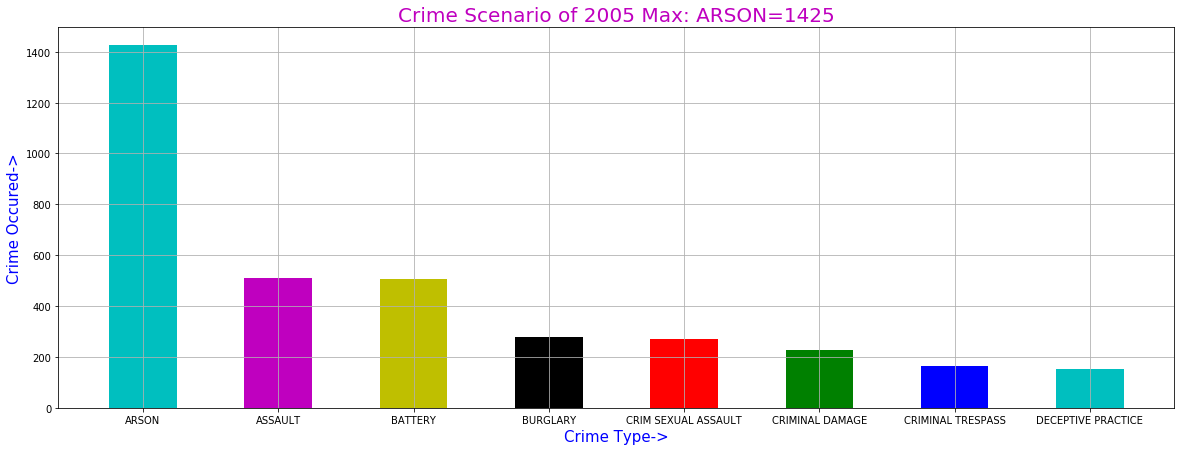

In [29]:
c05=c0507smooth[c0507smooth['Year']==2005]
c05=c05[c05.columns.tolist()[1:]]
c05.head()
c05arr=np.array(c05['Primary Type'])
c05u=np.unique(c05arr)
c05key=np.unique(np.array(np.array(c05['Primary Type'])))
c05val=np.array(c05['Primary Type'].value_counts().values)
print(c05u[:8])
print(c05val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2005 Max: {}={}".format(c05u[:8][0],c05val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c05u[:8],c05val[:8],color=color,width=0.5)

### 2006

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[132079 123369  95967  86258  40377  39584  37485  31994]


<BarContainer object of 8 artists>

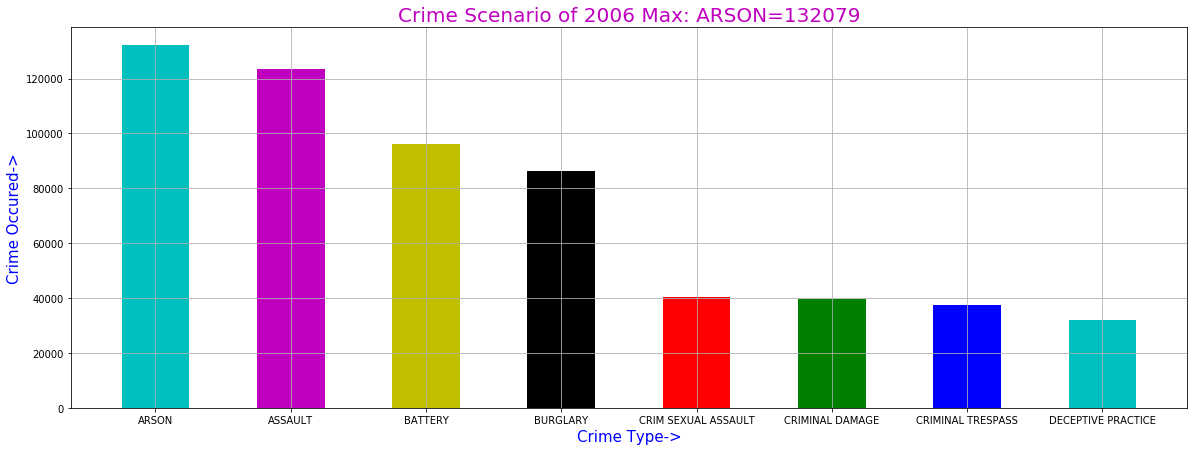

In [30]:
c06=c0507smooth[c0507smooth['Year']==2006]
c06=c06[c06.columns.tolist()[1:]]
c06.head()
c06arr=np.array(c06['Primary Type'])
c06u=np.unique(c06arr)
c06key=np.unique(np.array(np.array(c06['Primary Type'])))
c06val=np.array(c06['Primary Type'].value_counts().values)
print(c06u[:8])
print(c06val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2006 Max: {}={}".format(c06u[:8][0],c06val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c06u[:8],c06val[:8],color=color,width=0.5)

### 2007

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[66795 63815 45934 43019 22967 21821 18850 15300]


<BarContainer object of 8 artists>

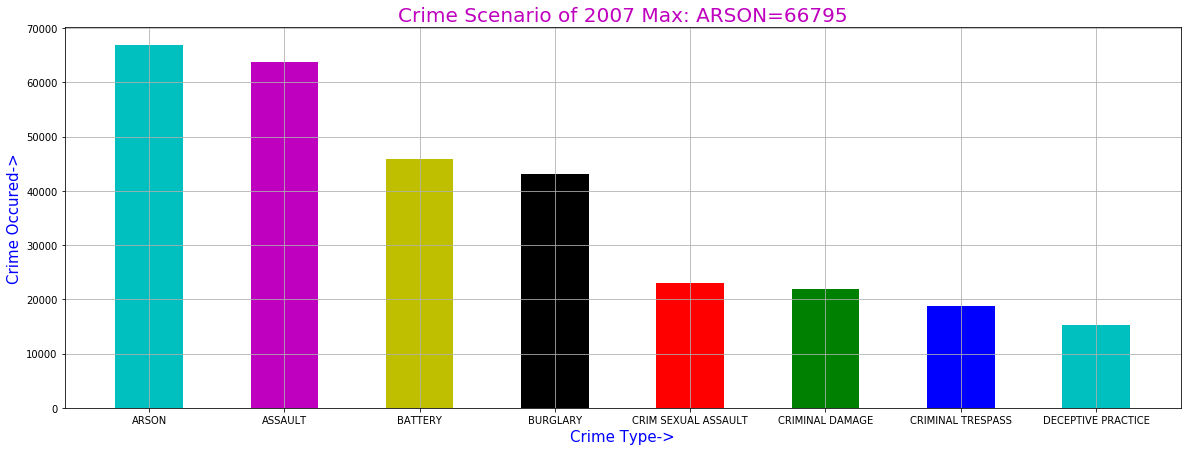

In [31]:
c07=c0507smooth[c0507smooth['Year']==2007]
c07=c07[c07.columns.tolist()[1:]]
c07.head()
c07arr=np.array(c07['Primary Type'])
c07u=np.unique(c07arr)
c07key=np.unique(np.array(np.array(c07['Primary Type'])))
c07val=np.array(c07['Primary Type'].value_counts().values)
print(c07u[:8])
print(c07val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2007 Max: {}={}".format(c07u[:8][0],c07val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c07u[:8],c07val[:8],color=color,width=0.5)

### 2008

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[88423 75917 52838 46506 26530 26213 25445 18878]


<BarContainer object of 8 artists>

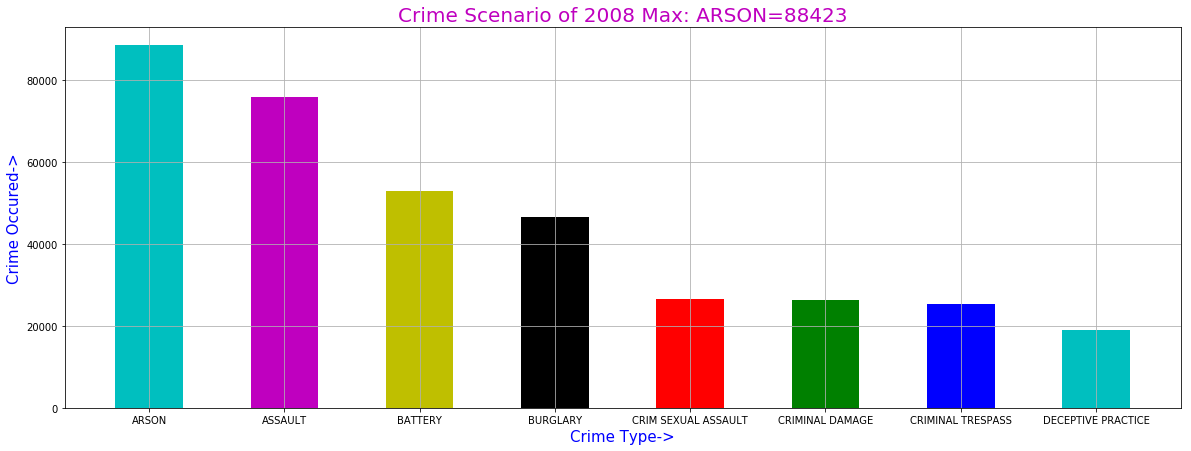

In [32]:
c08=c0811smooth[c0811smooth['Year']==2008]
c08=c08[c08.columns.tolist()[1:]]
c08.head()
c08arr=np.array(c08['Primary Type'])
c08u=np.unique(c08arr)
c08key=np.unique(np.array(np.array(c08['Primary Type'])))
c08val=np.array(c08['Primary Type'].value_counts().values)
print(c08u[:8])
print(c08val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2008 Max: {}={}".format(c08u[:8][0],c08val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c08u[:8],c08val[:8],color=color,width=0.5)

### 2009

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[80843 68369 47663 43452 26720 25569 22834 15952]


<BarContainer object of 8 artists>

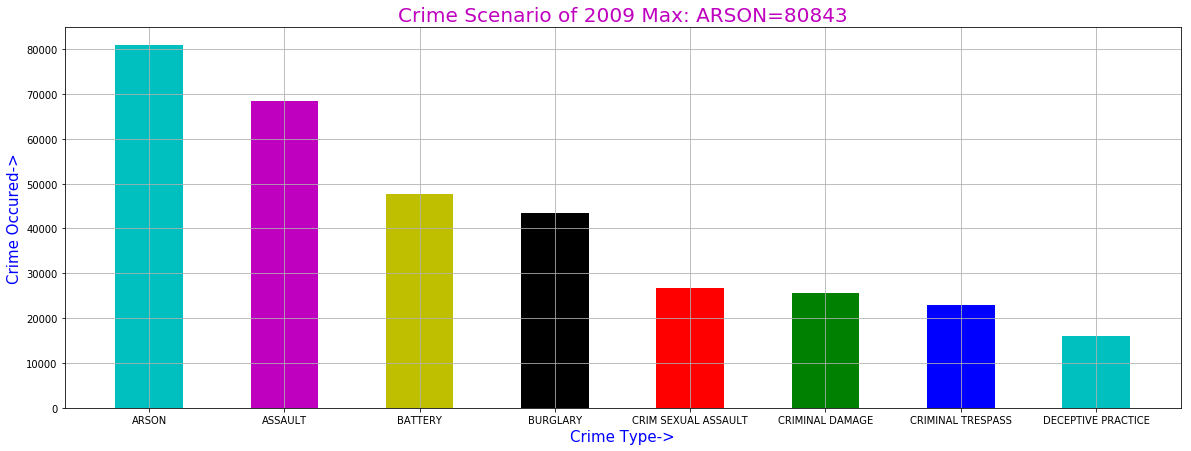

In [33]:
c09=c0811smooth[c0811smooth['Year']==2009]
c09=c09[c09.columns.tolist()[1:]]
c09.head()
c09arr=np.array(c09['Primary Type'])
c09u=np.unique(c09arr)
c09key=np.unique(np.array(np.array(c09['Primary Type'])))
c09val=np.array(c09['Primary Type'].value_counts().values)
print(c09u[:8])
print(c09val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2009 Max: {}={}".format(c09u[:8][0],c09val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c09u[:8],c09val[:8],color=color,width=0.5)

### 2010

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[46049 42557 28111 25688 15388 14062 13900 10848]


<BarContainer object of 8 artists>

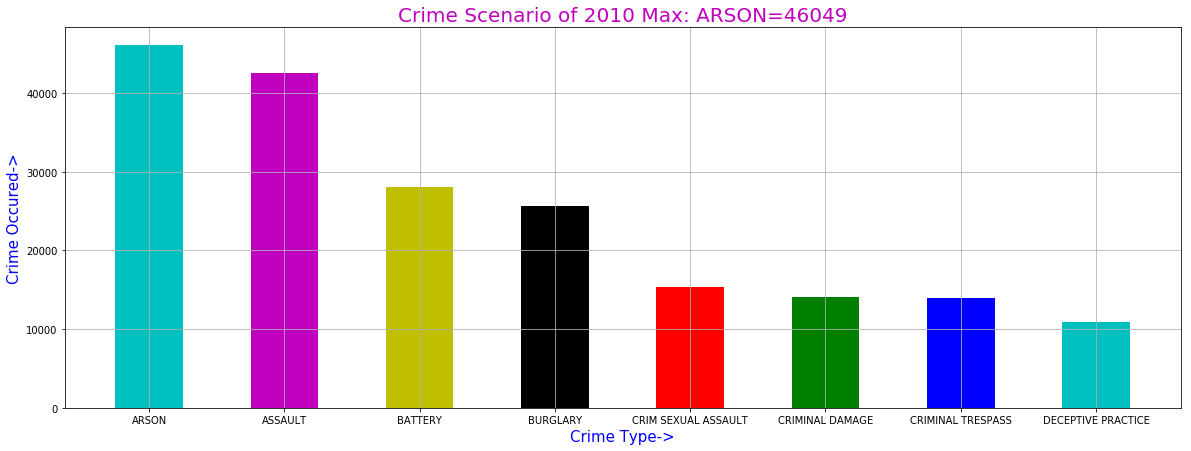

In [34]:
c10=c0811smooth[c0811smooth['Year']==2010]
c10=c10[c10.columns.tolist()[1:]]
c10.head()
c10arr=np.array(c10['Primary Type'])
c10u=np.unique(c10arr)
c10key=np.unique(np.array(np.array(c10['Primary Type'])))
c10val=np.array(c10['Primary Type'].value_counts().values)
print(c10u[:8])
print(c10val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2010 Max: {}={}".format(c10u[:8][0],c10val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c10u[:8],c10val[:8],color=color,width=0.5)

### 2011

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'DECEPTIVE PRACTICE' 'KIDNAPPING' 'MOTOR VEHICLE THEFT']
[193 108  85  44  25  24  17  12]


<BarContainer object of 8 artists>

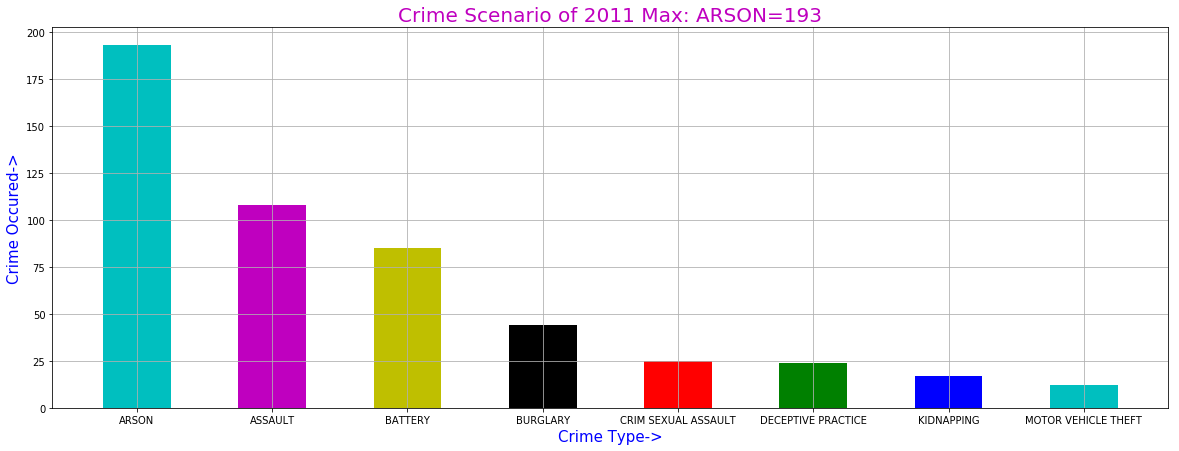

In [35]:
c11=c0811smooth[c0811smooth['Year']==2011]
c11=c11[c11.columns.tolist()[1:]]
c11.head()
c11arr=np.array(c11['Primary Type'])
c11u=np.unique(c11arr)
c11key=np.unique(np.array(np.array(c11['Primary Type'])))
c11val=np.array(c11['Primary Type'].value_counts().values)
print(c11u[:8])
print(c11val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2011 Max: {}={}".format(c11u[:8][0],c11val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c11u[:8],c11val[:8],color=color,width=0.5)

### 2012

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[75438 59125 35852 35379 22836 19896 17472 16486]


<BarContainer object of 8 artists>

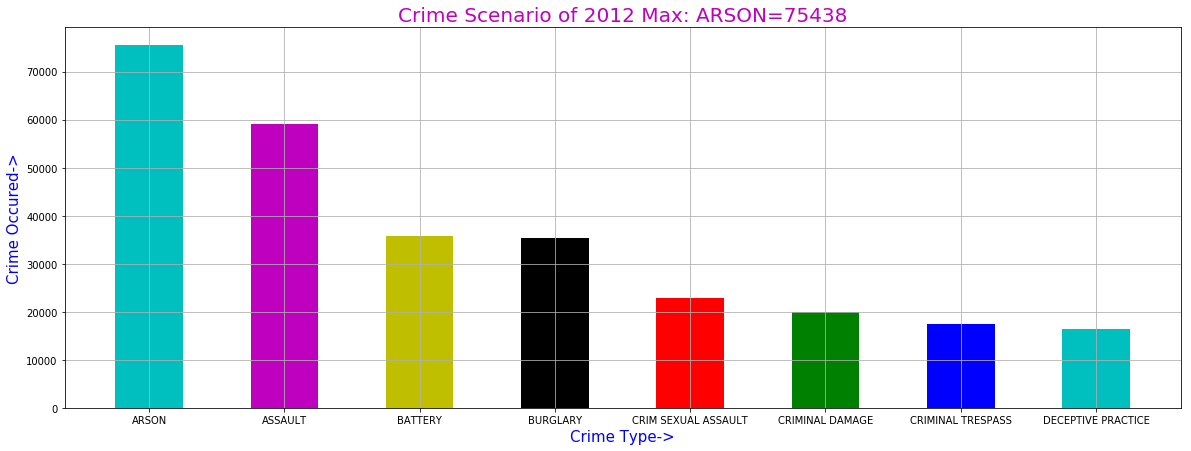

In [36]:
c12=c1217smooth[c1217smooth['Year']==2012]
c12=c12[c12.columns.tolist()[1:]]
c12.head()
c12arr=np.array(c12['Primary Type'])
c12u=np.unique(c12arr)
c12key=np.unique(np.array(np.array(c12['Primary Type'])))
c12val=np.array(c12['Primary Type'].value_counts().values)
print(c12u[:8])
print(c12val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2012 Max: {}={}".format(c12u[:8][0],c12val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c12u[:8],c12val[:8],color=color,width=0.5)

### 2013

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[71493 53984 34128 30851 17965 17965 17881 13127]


<BarContainer object of 8 artists>

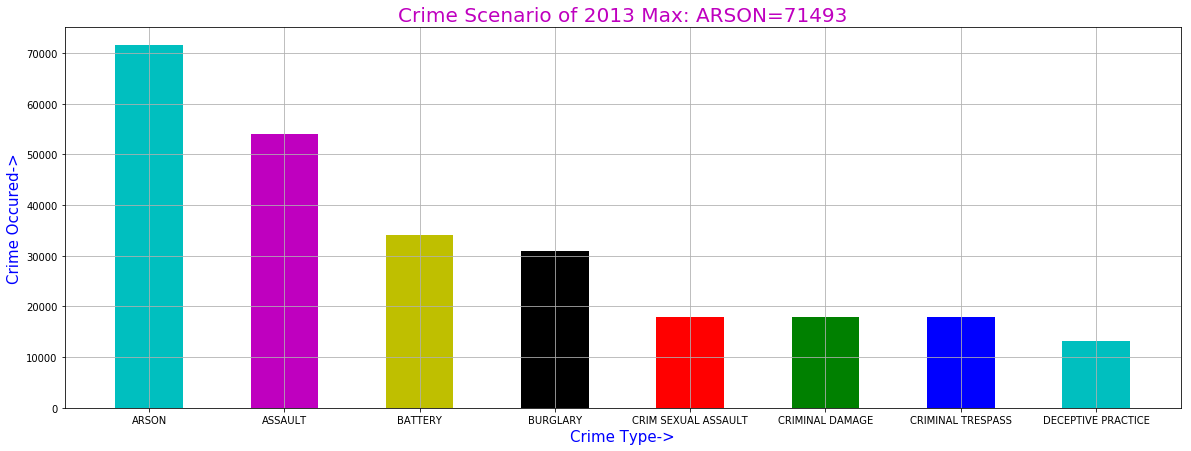

In [37]:
c13=c1217smooth[c1217smooth['Year']==2013]
c13=c13[c13.columns.tolist()[1:]]
c13.head()
c13arr=np.array(c13['Primary Type'])
c13u=np.unique(c13arr)
c13key=np.unique(np.array(np.array(c13['Primary Type'])))
c13val=np.array(c13['Primary Type'].value_counts().values)
print(c13u[:8])
print(c13val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2013 Max: {}={}".format(c13u[:8][0],c13val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c13u[:8],c13val[:8],color=color,width=0.5)

### 2014

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[61466 49393 28909 27783 16930 16884 14905 14541]


<BarContainer object of 8 artists>

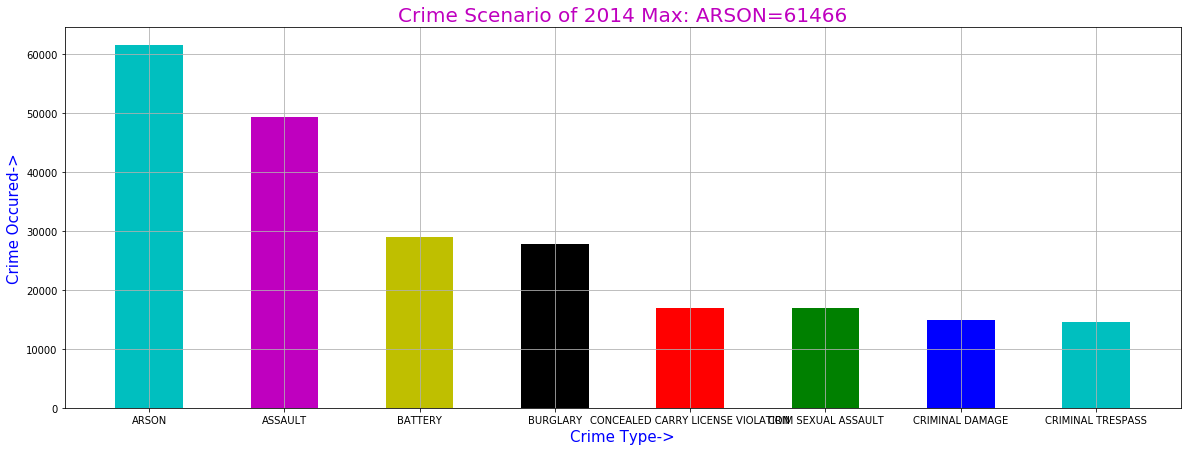

In [38]:
c14=c1217smooth[c1217smooth['Year']==2014]
c14=c14[c14.columns.tolist()[1:]]
c14.head()
c14arr=np.array(c14['Primary Type'])
c14u=np.unique(c14arr)
c14key=np.unique(np.array(np.array(c14['Primary Type'])))
c14val=np.array(c14['Primary Type'].value_counts().values)
print(c14u[:8])
print(c14val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2014 Max: {}={}".format(c14u[:8][0],c14val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c14u[:8],c14val[:8],color=color,width=0.5)

### 2015

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[22815 21252 11569 11060  7701  7376  5993  4923]


<BarContainer object of 8 artists>

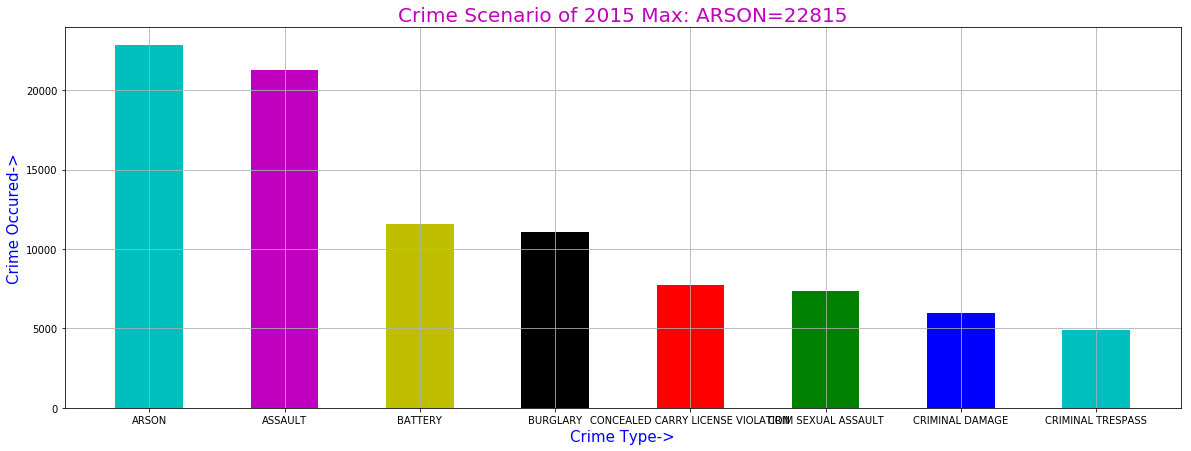

In [39]:
c15=c1217smooth[c1217smooth['Year']==2015]
c15=c15[c15.columns.tolist()[1:]]
c15.head()
c15arr=np.array(c15['Primary Type'])
c15u=np.unique(c15arr)
c15key=np.unique(np.array(np.array(c15['Primary Type'])))
c15val=np.array(c15['Primary Type'].value_counts().values)
print(c15u[:8])
print(c15val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2015 Max: {}={}".format(c15u[:8][0],c15val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c15u[:8],c15val[:8],color=color,width=0.5)

### 2016

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[5512 5071 2976 1928 1643 1469 1305 1277]


<BarContainer object of 8 artists>

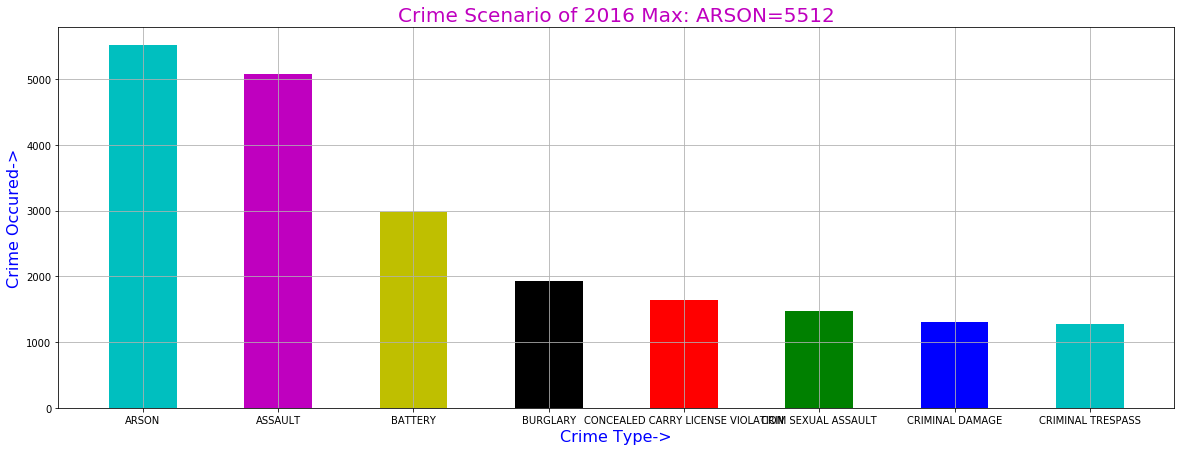

In [40]:
c16=c1217smooth[c1217smooth['Year']==2016]
c16=c16[c16.columns.tolist()[1:]]
c16.head()
c16arr=np.array(c16['Primary Type'])
c16u=np.unique(c16arr)
c16key=np.unique(np.array(np.array(c16['Primary Type'])))
c16val=np.array(c16['Primary Type'].value_counts().values)
print(c16u[:8])
print(c16val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2016 Max: {}={}".format(c16u[:8][0],c16val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=16,color='b')
plt.ylabel("Crime Occured->",fontsize=16,color='b')
plt.grid()
plt.bar(c16u[:8],c16val[:8],color=color,width=0.5)

### 2017

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'DECEPTIVE PRACTICE']
[80843 68369 47663 43452 26720 25569 22834 15952]


<BarContainer object of 28 artists>

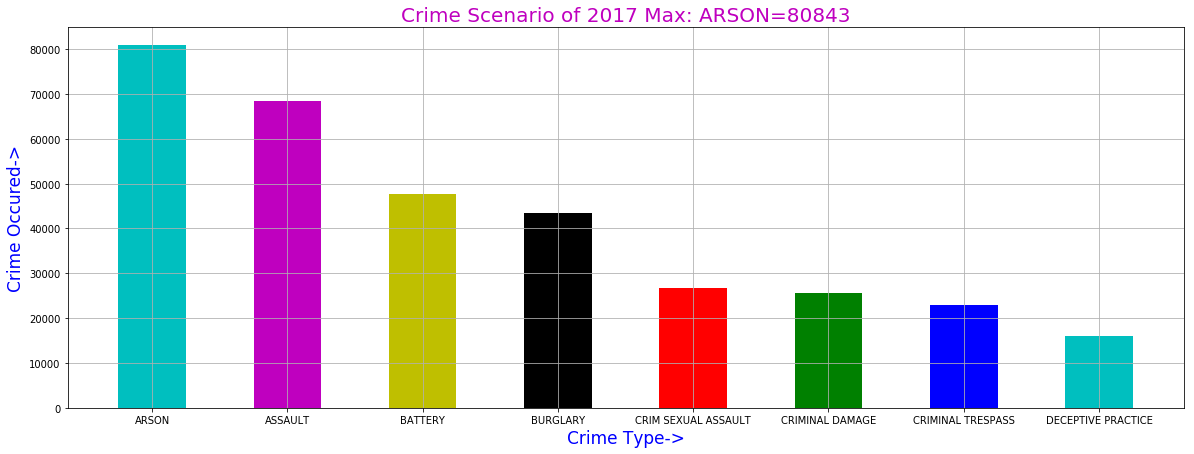

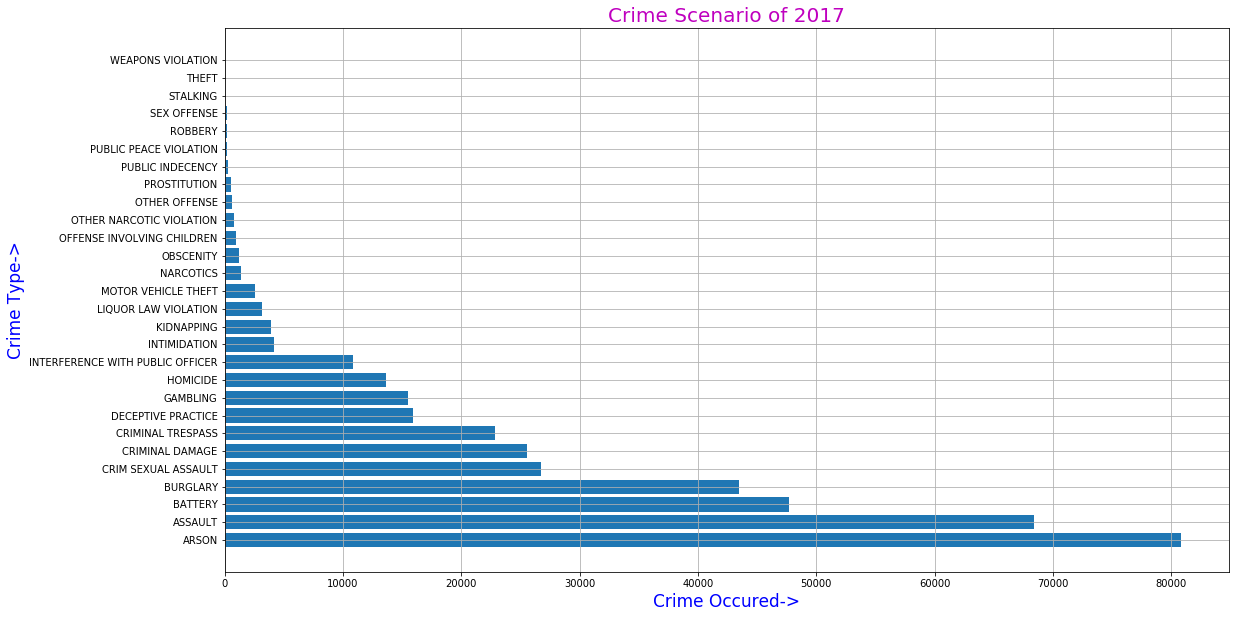

In [203]:
c17=c0811smooth[c0811smooth['Year']==2009]
c17=c17[c17.columns.tolist()[1:]]
c17.head()
c17arr=np.array(c17['Primary Type'])
c17u=np.unique(c17arr)
c17key=np.unique(np.array(np.array(c17['Primary Type'])))
c17val=np.array(c17['Primary Type'].value_counts().values)
print(c17u[:8])
print(c17val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2017 Max: {}={}".format(c17u[:8][0],c17val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=17,color='b')
plt.ylabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.bar(c17u[:8],c17val[:8],color=color,width=0.5)
plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2017",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c17u,c17val)
#c17.groupby('Primary Type')['Arrest'].count()



### 2018

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[65120 49790 27810 20384 18864 17152 13151 11733]


<BarContainer object of 32 artists>

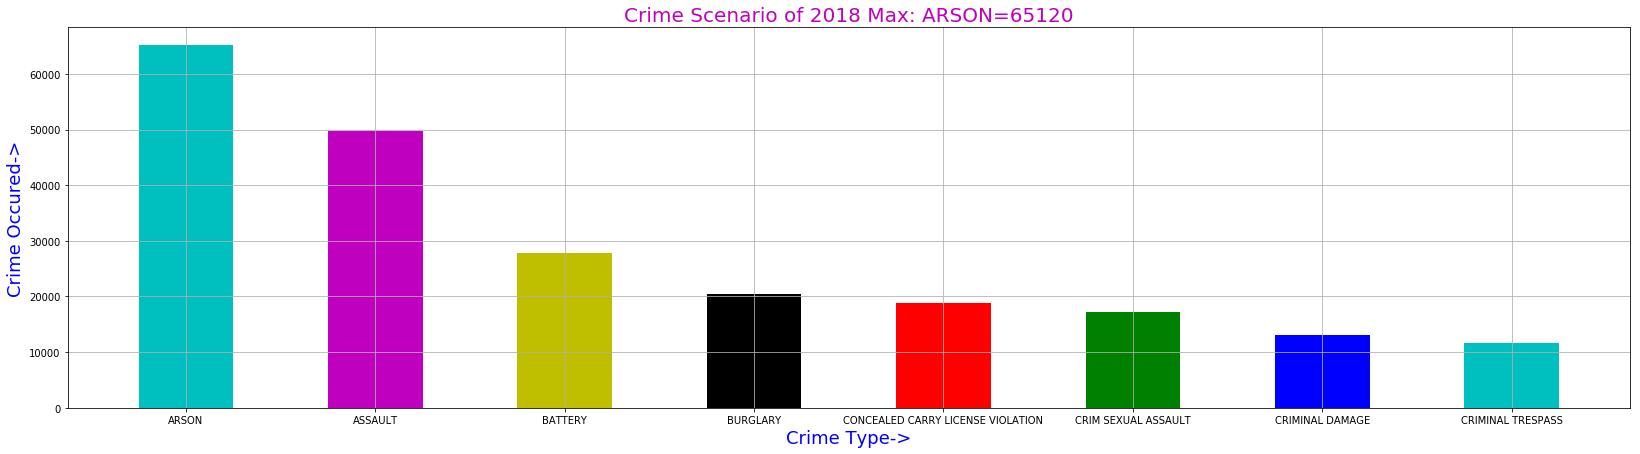

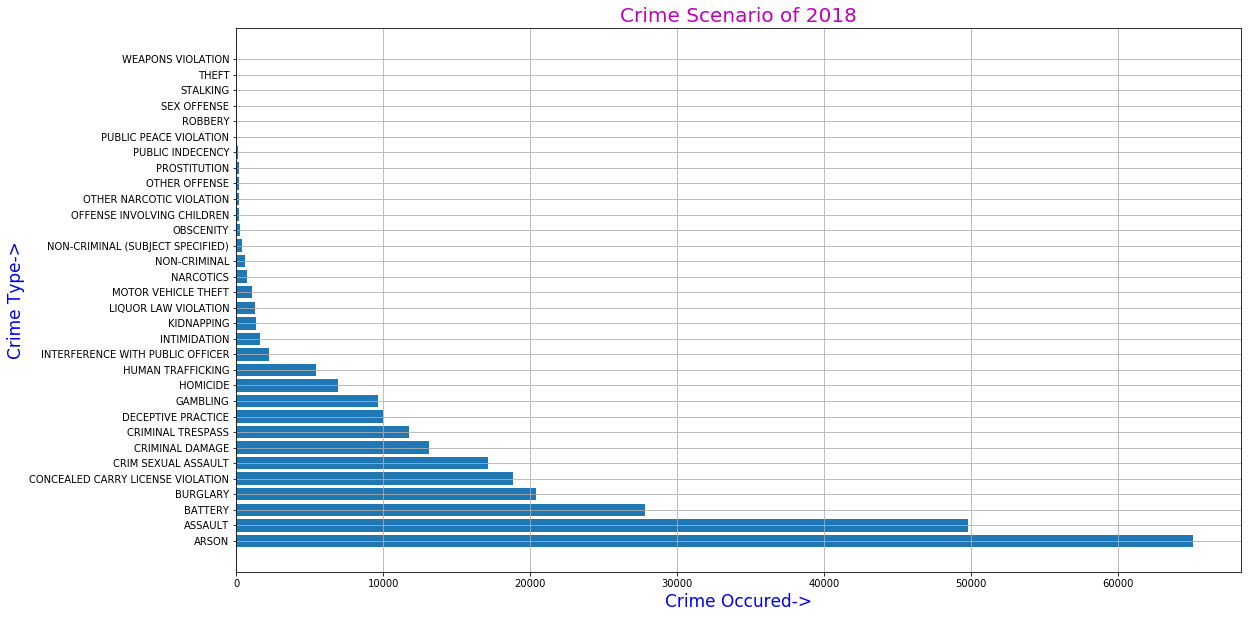

In [205]:
c18=c1719[c1719['Year']==2018]
c18=c18[c18.columns.tolist()[1:]]
c18.head()
c18arr=np.array(c18['Primary Type'])
c18u=np.unique(c18arr)
c18key=np.unique(np.array(np.array(c18['Primary Type'])))
c18val=np.array(c18['Primary Type'].value_counts().values)
print(c18u[:8])
print(c18val[:8])
color='cmykrgb'
plt.figure(figsize=(28,7))
plt.title("Crime Scenario of 2018 Max: {}={}".format(c18u[:8][0],c18val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=18,color='b')
plt.ylabel("Crime Occured->",fontsize=18,color='b')
plt.grid()
plt.bar(c18u[:8],c18val[:8],color=color,width=0.5)

plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2018",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c18u,c18val)

### 2019 

['ARSON' 'ASSAULT' 'BATTERY' 'BURGLARY'
 'CONCEALED CARRY LICENSE VIOLATION' 'CRIM SEXUAL ASSAULT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS']
[19242 16158  8467  6819  6017  5651  4974  3034]


<BarContainer object of 31 artists>

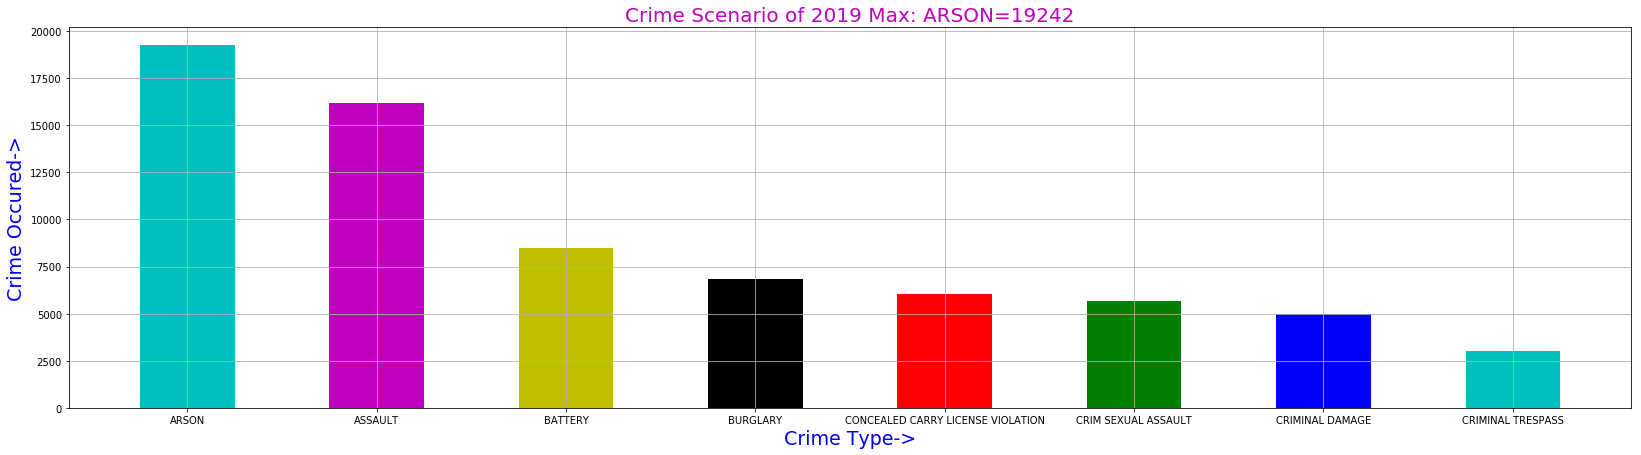

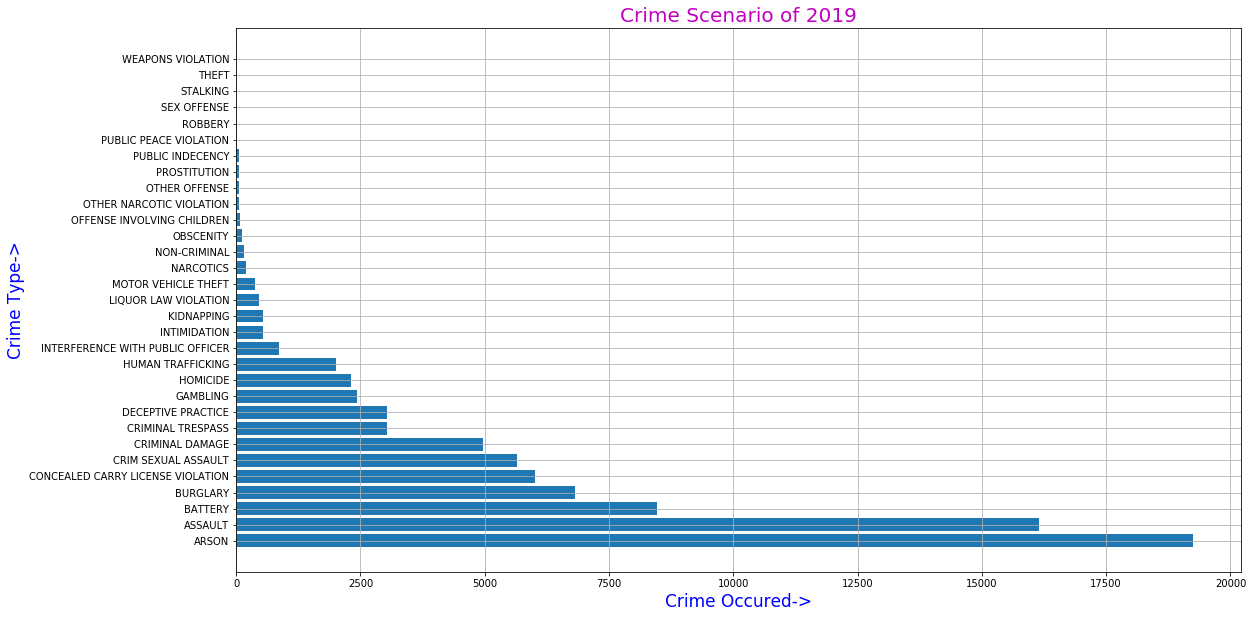

In [207]:
c19=c1719[c1719['Year']==2019]
c19=c19[c19.columns.tolist()[1:]]
c19.head()
c19arr=np.array(c19['Primary Type'])
c19u=np.unique(c19arr)
c19key=np.unique(np.array(np.array(c19['Primary Type'])))
c19val=np.array(c19['Primary Type'].value_counts().values)
print(c19u[:8])
print(c19val[:8])
color='cmykrgb'
plt.figure(figsize=(28,7))
plt.title("Crime Scenario of 2019 Max: {}={}".format(c19u[:8][0],c19val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=19,color='b')
plt.ylabel("Crime Occured->",fontsize=19,color='b')
plt.grid()
plt.bar(c19u[:8],c19val[:8],color=color,width=0.5)

plt.figure(figsize=(18,10))
plt.title("Crime Scenario of 2019",fontsize=20,color='m')
plt.ylabel("Crime Type->",fontsize=17,color='b')
plt.xlabel("Crime Occured->",fontsize=17,color='b')
plt.grid()
plt.barh(c19u,c19val)

In [162]:
crmyr=['2019','2018','2017','2016','2015','2014','2013','2012']
crm=[c19val[:8][0],c18val[:8][0],c17val[:8][0],c16val[:8][0],c15val[:8][0],c14val[:8][0],c13val[:8][0],c12val[:8][0]]

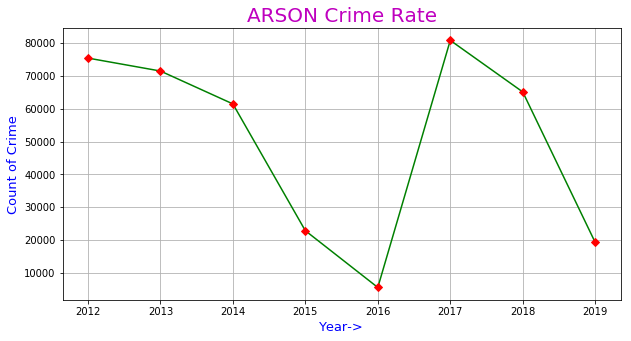

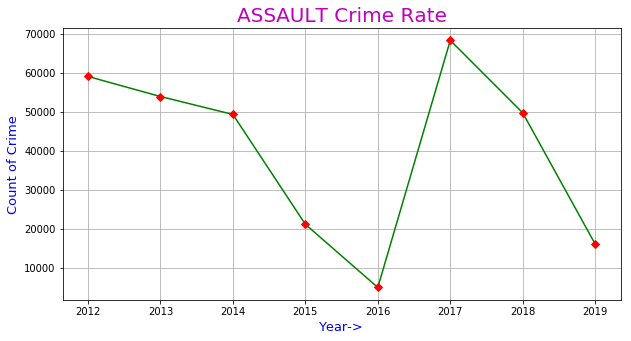

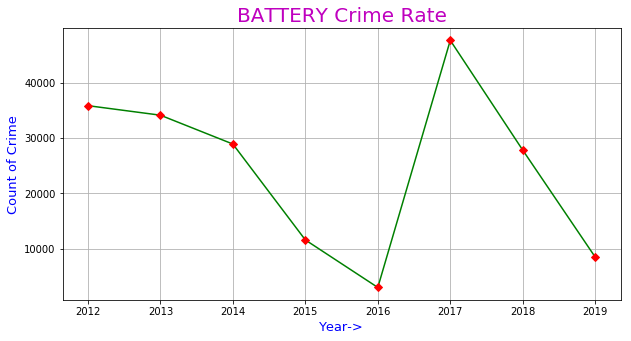

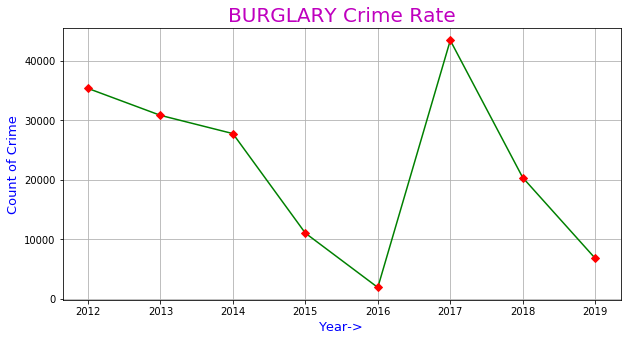

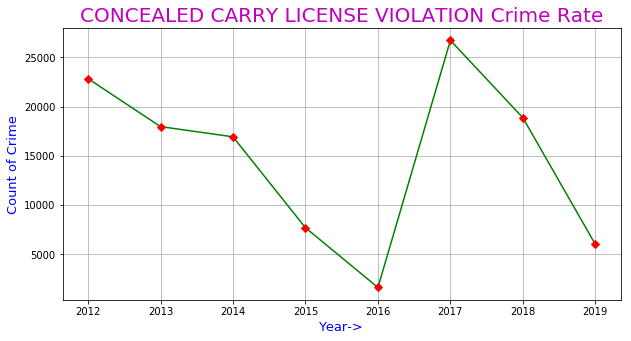

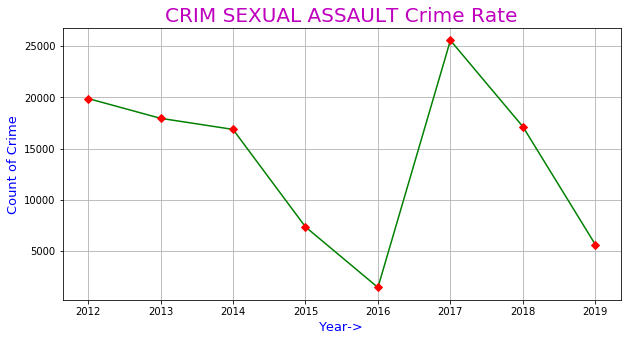

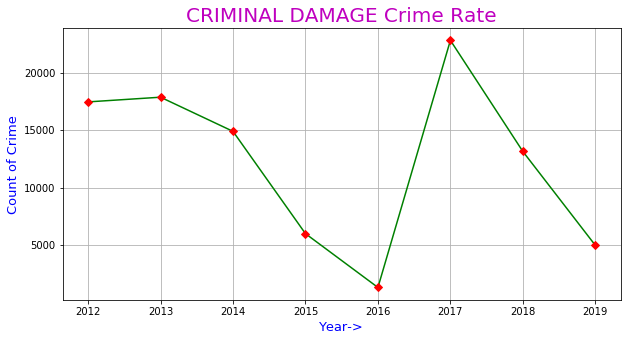

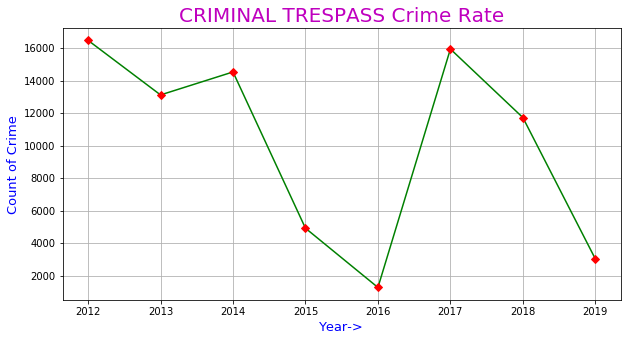

In [178]:
for i in range(len(c19u[:8])):
    plt.figure(figsize=(10,5))
    crmyr=['2019','2018','2017','2016','2015','2014','2013','2012']
    crm=[c19val[:8][i],c18val[:8][i],c17val[:8][i],c16val[:8][i],c15val[:8][i],c14val[:8][i],c13val[:8][i],c12val[:8][i]]
    plt.title("{} Crime Rate".format(c19u[:8][i]),fontsize=20,color="m")
    plt.xlabel("Year->",fontsize=13,color="b")
    plt.ylabel("Count of Crime",fontsize=13,color="b")
    plt.grid()
    plt.plot(crmyr[::-1],crm[::-1],"g")
    plt.plot(crmyr[::-1],crm[::-1],"Dr")

### Comparative analysis of 10 years

#### Arrest

In [86]:
c19arst=np.array(c1719['Arrest'])
c19arstu=np.unique(c19arst)
print(c19arstu)
c19arst=c19arst.tolist()
cntt19=

[False  True]


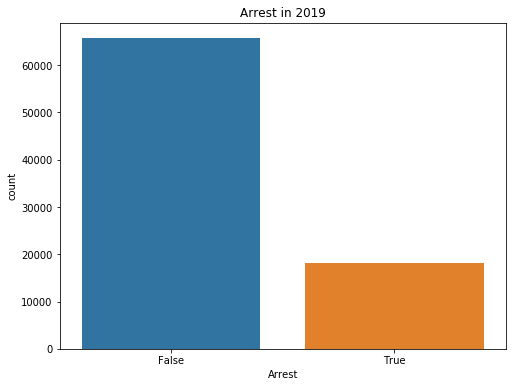

In [91]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2019")
sns.countplot(c19['Arrest'])

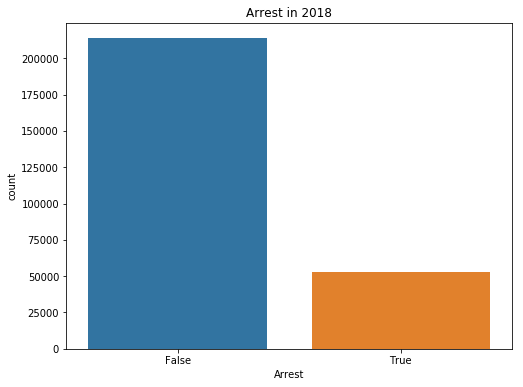

In [98]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2018")
sns.countplot(c18['Arrest'])

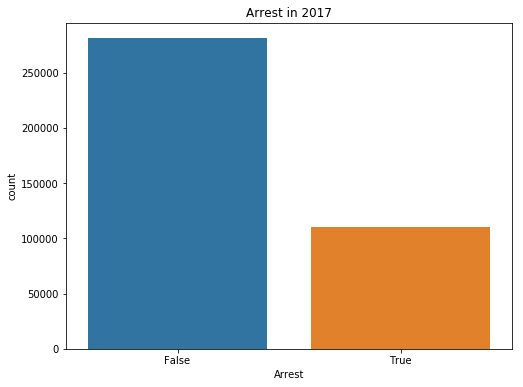

In [99]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2017")
sns.countplot(c17['Arrest'])

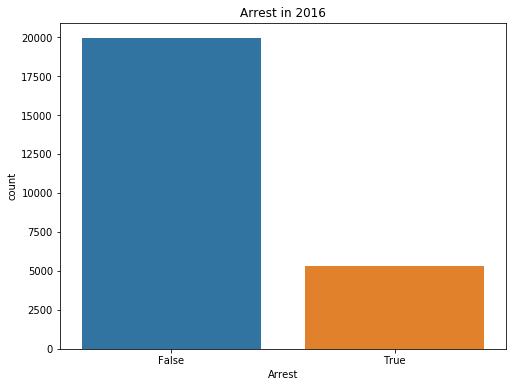

In [100]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2016")
sns.countplot(c16['Arrest'])

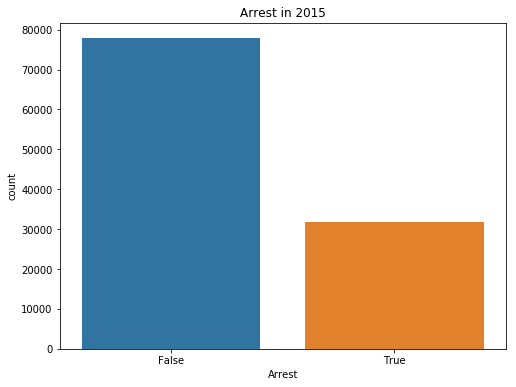

In [101]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2015")
sns.countplot(c15['Arrest'])

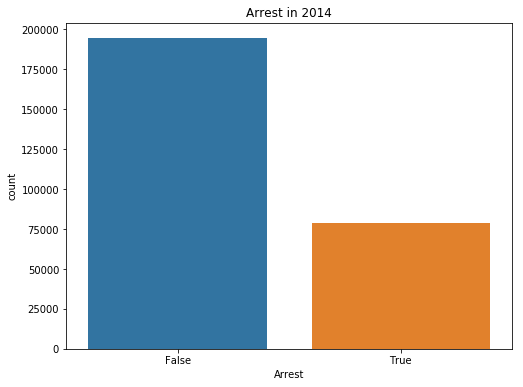

In [102]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2014")
sns.countplot(c14['Arrest'])

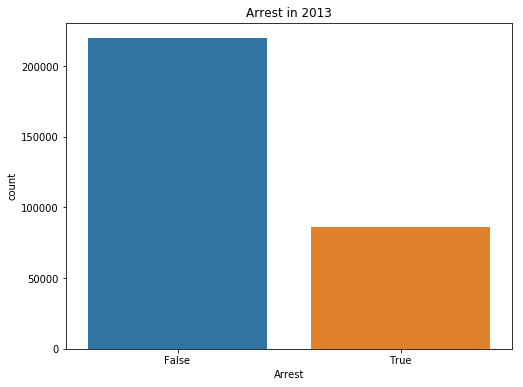

In [103]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2013")
sns.countplot(c13['Arrest'])

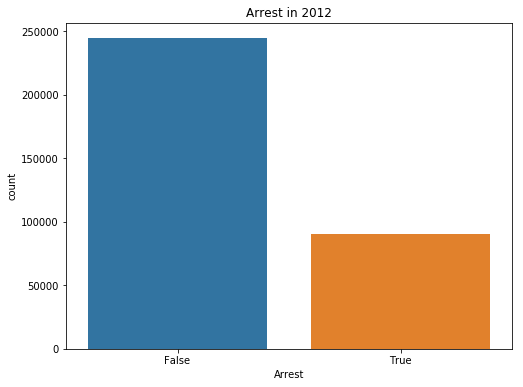

In [104]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2012")
sns.countplot(c12['Arrest'])

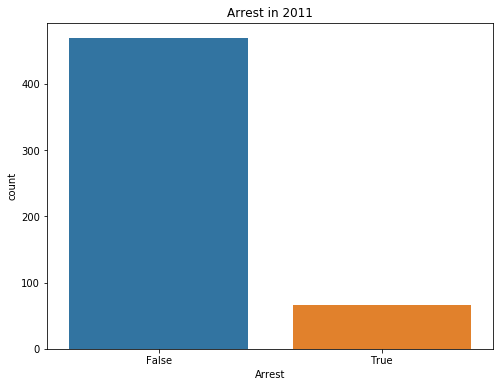

In [105]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2011")
sns.countplot(c11['Arrest'])

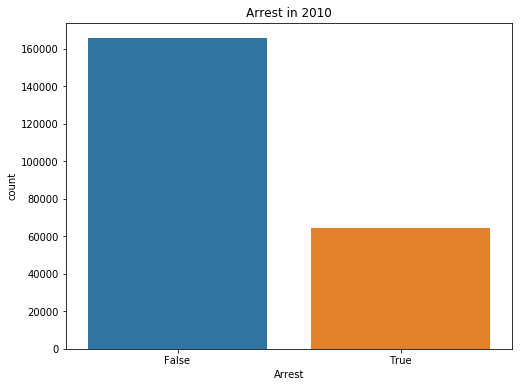

In [106]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2010")
sns.countplot(c10['Arrest'])

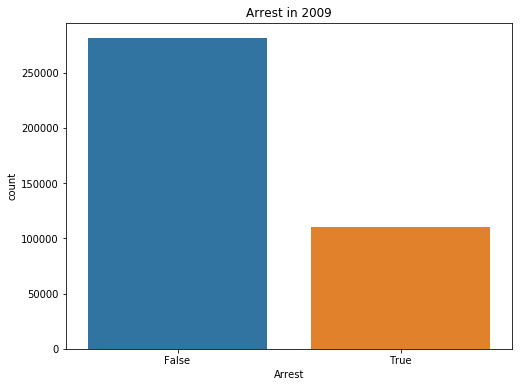

In [108]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2009")
sns.countplot(c09['Arrest'])

## Primary Type with Arrest

In [117]:
np.array(c19.groupby('Primary Type')['Arrest'].count())

array([  115,  6819, 16158,  3034,    61,   546,  8467,  2311,  5651,
          20,   149,     5,   459,    60,    64,    58,  3032,  4974,
           2,    16,   867,     1,  6017,   205,     1,   536,  2429,
         386,    79, 19242,  2004], dtype=int64)

In [118]:
np.array(c18.groupby('Primary Type')['Arrest'].count())

array([  373, 20384, 49790, 11733,   149,  1642, 27810,  6905, 18864,
         201,   588,    14,  1305,   169,   171,   268,  9979, 13151,
          36,     3,    87,  2233,     1, 17152,   718,    14,  1371,
        9683,  1107,   205, 65120,  5453], dtype=int64)

In [119]:
np.array(c17.groupby('Primary Type')['Arrest'].count())

array([  615, 22834, 68369, 26720,  1381, 47663, 10834, 13648,   990,
         231,   572,   231,   293,   745, 15460, 43452,    21,  2523,
           7, 25569,  3939,    10,  3138, 15952,  1233,   167, 80843,
        4157], dtype=int64)

In [120]:
np.array(c16.groupby('Primary Type')['Arrest'].count())

array([  55, 1928, 5071, 1277,    1,  136, 2976,  652, 1469,   22,   68,
          1,   86,   12,   19,   27,  936, 1305,    1,    2,    4,  220,
       1643,  101,    3,  169, 1069,   70,   12, 5512,  367], dtype=int64)

In [121]:
np.array(c15.groupby('Primary Type')['Arrest'].count())

array([  175,  7376, 21252,  4923,    14,   474, 11569,  2985,  5993,
         118,     4,     4,   585,    52,    79,   133,  4085, 11060,
           6,     2,    23,   923,     3,  7701,   745,     5,  1103,
        3584,   331,    71, 22815,  1492], dtype=int64)

In [122]:
np.array(c14.groupby('Primary Type')['Arrest'].count())

array([  396, 16884, 49393, 14541,    15,  1234, 27783,  7536, 14905,
         393,     2,     2,  1397,   116,   219,   395,  9895, 28909,
          10,    16,     1,    35,  2273,    10, 16930,  1623,    10,
        2899,  9786,   903,   139, 61466,  3106], dtype=int64)

In [123]:
np.array(c13.groupby('Primary Type')['Arrest'].count())

array([  364, 17965, 53984, 17881,  1224, 30851,  8135, 13127,   596,
           3,     1,  1281,   134,   242,   465, 12579, 34128,     3,
           4,    22,  2281,     5, 17965,  1652,    10,  3135, 11816,
         995,   153, 71493,  3244], dtype=int64)

In [124]:
np.array(c12.groupby('Primary Type')['Arrest'].count())

array([  469, 19896, 59125, 22836,  1381, 35852,  8215, 13203,   724,
           1,  1228,   156,   236,   573, 16486, 35379,     6,     2,
          26,  2155,     6, 17472,  2203,    17,  3007, 13482,  1031,
         207, 75438,  3903], dtype=int64)

In [125]:
np.array(c11.groupby('Primary Type')['Arrest'].count())

array([  2,  44,  85,   2,  17, 193,   1,   3,  24,  25,  11,   6,  12,
       108,   2], dtype=int64)

In [126]:
np.array(c10.groupby('Primary Type')['Arrest'].count())

array([  335, 13900, 42557, 15388,   770, 25688,  6076,  7341,   612,
         512,   138,   211,   509, 10848, 28111,     1,    19,  1491,
           5, 14062,  1589,     3,  2292,  8420,   599,   113, 46049,
        2415], dtype=int64)

In [127]:
np.array(c09.groupby('Primary Type')['Arrest'].count())

array([  615, 22834, 68369, 26720,  1381, 47663, 10834, 13648,   990,
         231,   572,   231,   293,   745, 15460, 43452,    21,  2523,
           7, 25569,  3939,    10,  3138, 15952,  1233,   167, 80843,
        4157], dtype=int64)

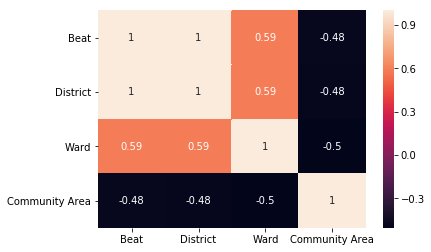

In [132]:
c19num=c19[['Beat','District','Ward','Community Area']]
sns.heatmap(c19num.corr(),annot=True)

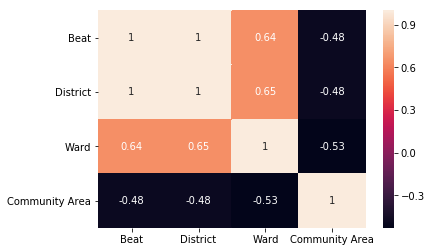

In [133]:
c18num=c18[['Beat','District','Ward','Community Area']]
sns.heatmap(c18num.corr(),annot=True)

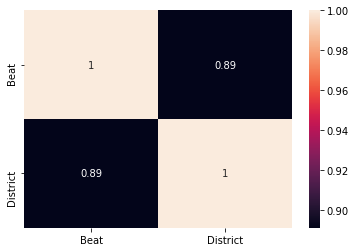

In [139]:
c01num=c01[['Beat','District']]
sns.heatmap(c01num.corr(),annot=True)

In [158]:
c19.corr().to_csv(link+"corr.csv")

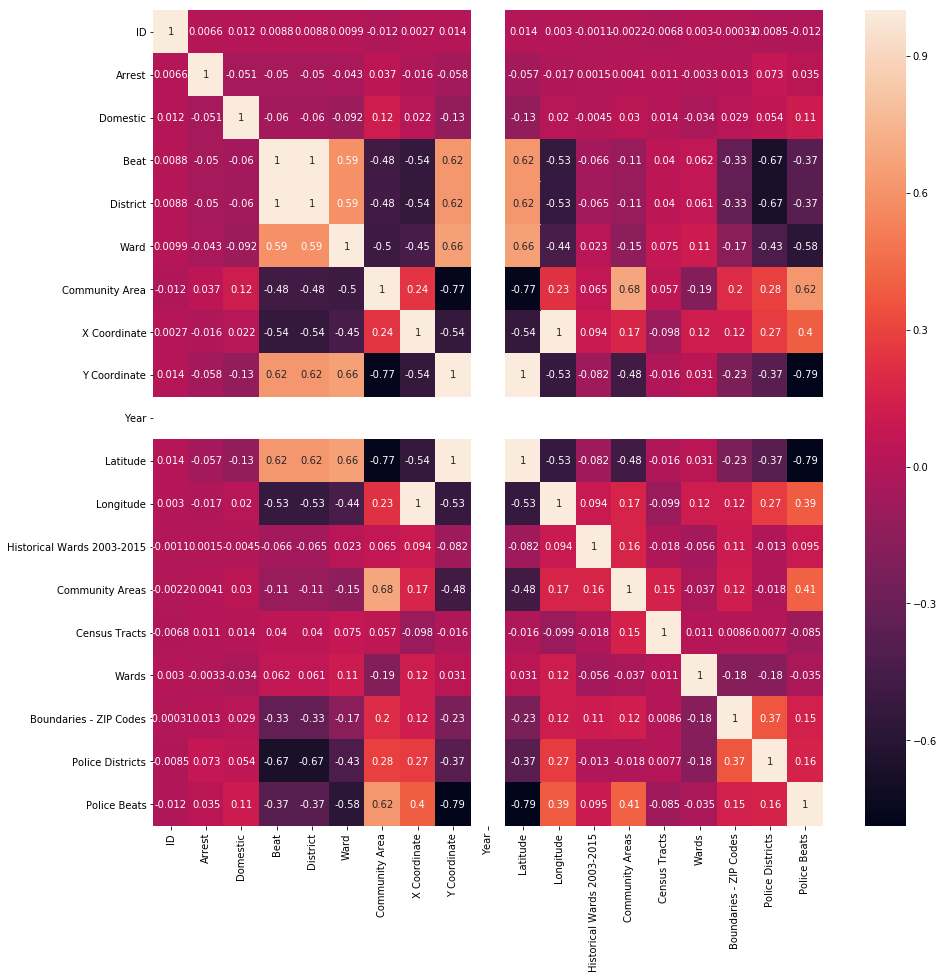

In [156]:
plt.figure(figsize=(15,15))
sns.heatmap(c19.corr(),annot=True)

In [215]:
c19map['Latitude'].iloc[0]

41.68907883

In [221]:
import folium 
import folium.plugins as plugins
import branca

In [222]:
locations = c18['Latitude'][0], c18['Longitude'][0]
print("Lat Mean: ",c18['Latitude'][0])
print("Long Mean: ",c18['Longitude'][0])
m = folium.Map(location=locations,zoom_start=7)

def colsel(i):
    if c18['Arrest'].iloc[i] == 1:
        color = 'blue'
    elif c18['Arrest'].iloc[i] == 2:
        color = 'green'
    else:
        color = 'red'
    return color

for i in range(100):
    #m = folium.Map(location=location,zoom_start=12)
    #print(accupdate.iloc[i]['Latitude']," ", accupdate.iloc[i]['Longitude'])
    show="Accident Loc=> Lat:"+str(c18.iloc[i]['Latitude'])+" long:"+str(c18.iloc[i]['Longitude'])
    popup = folium.Popup(show, parse_html=True) 
    folium.Marker([c18.iloc[i]['Latitude'], c18.iloc[i]['Longitude']],popup=popup,
                  icon=folium.Icon(color=colsel(i))
                 ).add_to(m)
    #m.add_child(folium.Marker(locations,popup="Accident Loc=> Lat:"+str(accupdate.iloc[i]['Latitude'])+" long:"+str(accupdate.iloc[i]['Longitude']),icon=folium.Icon(color="blue", icon='info-sign')))
m.save('D:/As Freelancer/Live Assignment/DigiVersal/DVMAY004/Accident_Severity2.html')


KeyError: 0